In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import time
import seaborn as sn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
import tsfresh

In [2]:
path = "/Users/sdonzis/Desktop/ENPC/Project_Data_GCC/Data/"
os.chdir(path)
df_data = pd.read_csv("alldata.csv", header=0)
df_data = df_data.dropna()
seed = 42

In [43]:
df_data = df_data.reset_index(drop=True)
df_data

Niveau  Fréquences 1  Fréquences 2  Amortissement 1  Amortissement 2  \
0         0.0        1787.0        1887.0            2.999            0.685   
1         0.0        1703.0        1854.0            1.116            0.692   
2         1.0        1536.0        1753.0            1.270            0.666   
3         0.0        1720.0        1870.0            0.399            0.744   
4         0.0        1737.0        1937.0            1.434            1.875   
...       ...           ...           ...              ...              ...   
22515     0.0        1687.0        1687.0            0.997            0.997   
22516     1.0        1653.0        1653.0            0.953            0.953   
22517     1.0        1603.0        1603.0            1.296            1.296   
22518     1.0        1603.0        1603.0            1.781            1.781   
22519     1.0        1586.0        1586.0            1.313            1.313   

       Exploitable                                              Temps  \
0              1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
1              1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
2              1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
3              1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
4              1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
...            ...                                                ...   
22515          0.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
22516          1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
22517          1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
22518          1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   
22519          1.0  [0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...   

                                                 Vitesse  \
0      [-0.009452226, -0.00673604, -0.00773401, -0.00...   
1      [-0.009723845, -0.01022985, -0.009524251, -0.0...   
2      [-0.005207651, -0.004080281, -0.003525446, -0....   
3      [-0.009192205, -0.007869514, -0.005686188, -0....   
4      [-0.009271554, -0.005567775, -0.007788333, -0....   
...                                                  ...   
22515  [-0.01355889, 0.01341383, -0.01825676, 0.02300...   
22516  [0.003902026, 0.004745687, 0.009357417, 0.0031...   
22517  [0.00807146, 0.002469452, 0.00569809, 0.007115...   
22518  [0.001331945, -0.007937943, -0.001371925, -0.0...   
22519  [0.002458455, 0.004559972, 0.00771408, 0.00272...   

                                              Fréquences  \
0      [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
1      [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
2      [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
3      [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
4      [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
...                                                  ...   
22515  [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
22516  [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
22517  [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
22518  [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   
22519  [0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...   

                                                FRF réel  \
0      [-0.0, -2.302514e-05, -5.967823e-05, 0.0002342...   
1      [-0.0, 3.561831e-05, 7.394589e-05, -0.00116518...   
2      [-0.0, 0.0003261978, 0.001021632, 0.001841591,...   
3      [-0.0, -0.000162651, 0.0005646234, 0.002073547...   
4      [-0.0, -0.0004254416, 0.0007007722, -0.0006456...   
...                                                  ...   
22515  [0.0, -0.000133851, 3.550028e-05, -0.000220231...   
22516  [0.0, 0.000550633, -0.0006232385, -0.000886531...   
22517  [0.0, -9.453296e-05, -0.001915368, -0.00331260...   
22518  [0.0, -4.969198e-05, 0.0002569928, 0.000265587...   
22519  [0.0, -0.0003772035, 0.0005063798, 0.002331598...   

                  

In [4]:
# list_vitesse = pd.Series(df_data['Vitesse'], dtype="float").to_numpy
# np.array(df_data[df_data.columns[1:5]])[:5]

In [25]:
# preprocessing data
# pandas with strings to numpy array
list_vitesse = []
for i in df_data['Vitesse']:
    list_vitesse.append(eval(i))

list_frf_reel = []
for i in df_data['FRF réel']:
    list_frf_reel.append(eval(i))

list_frf_imag = []
for i in df_data['FRF imag']:
    list_frf_imag.append(eval(i))

In [26]:
np_features = np.array(df_data[df_data.columns[1:5]])    
np_vitesse = np.array(list_vitesse)
np_frf_reel = np.array(list_frf_reel)
np_frf_imag = np.array(list_frf_imag)
np_frf = np.sqrt(np.square(np_frf_reel) + np.square(np_frf_imag))

np_class_categorical = df_data['Niveau'].values
# np_class = pd.get_dummies(np_class_categorical).values
# np_data = np.concatenate((np_features, np_vitesse, np_frf, np_class), axis=1)

In [27]:
np_features=[]
for i in range(np_vitesse.shape[0]):
        a=[]
        for j in range(np_vitesse.shape[1]):
                a.append(([np_vitesse[i,j], np_frf[i,j]]))
        np_features.append(np.array(a))
np_features=np.array(np_features)

In [97]:
df_data["Niveau"] == 2 & df_data["Exploitable"] == 1

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [99]:
index_2 = df_data[(df_data["Niveau"] == 2) & (df_data["Exploitable"] == 1)].index
index_3 = df_data[(df_data["Niveau"] == 3) & (df_data["Exploitable"] == 1)].index
index_4 = df_data[(df_data["Niveau"] == 4) & (df_data["Exploitable"] == 1)].index

print("nb of classe 2:", len(index_2))
print("nb of classe 3:", len(index_3))
print("nb of classe 4:", len(index_4))

data_2 = np_features[index_2]
data_3 = np_features[index_3]
data_4 = np_features[index_4]

nb of classe 2: 2159
nb of classe 3: 217
nb of classe 4: 42


In [121]:
############ Data Augmentation ###############
def data_augmentation(data, labels, num_augmentations):
    # Create an empty list for augmented data
    augmented_time_series_list = []
    augmented_labels = []
    index_augmented = []
    
    j=0
    for i in range(num_augmentations): 
        for sample, label in zip(data, labels):
            # Copy the original time series to start with
            augmented_ts = sample.copy()
        
            do_flip, do_noise, do_scale, do_shift = False,False,False,False
                
            # Scaling data
            do_scale = np.random.choice([True, False])
            if do_scale:
                # Choose a random scaling factor
                scale_factor = np.random.uniform(low=0.9, high=1.1)
                # Scale the time series
                augmented_ts = augmented_ts * scale_factor
    
            # Shifting data
            shift_steps = np.random.randint(low=-15, high=15)
            for feature in range(augmented_ts.shape[1]):
                # Shift the time series for the individual feature
                augmented_ts[:, feature] = np.roll(augmented_ts[:, feature], shift_steps)
    
            # Adding noise
            do_noise = np.random.choice([True, False])
            if do_noise:
                # Get the maximum value of each feature
                max_values = np.max(augmented_ts, axis=0)
                # Calculate the noise mean for each feature using the maximum value
                noise_mean = np.random.uniform(low=-0.01, high=0.05, size=augmented_ts.shape[1])*max_values
                noise_std = np.random.uniform(low=0.001, high=0.005)*max_values
                # Add noise to the time series
                noise = np.random.normal(0, noise_std, augmented_ts.shape)
                augmented_ts = augmented_ts + noise
    
            if not do_flip and not do_noise and not do_scale and not do_shift:
                # Update augmented indexes
                index_augmented.append(j)
                                
            # Append the augmented time series to the list         
            augmented_time_series_list.append(augmented_ts)
        
            # Update label data
            augmented_labels.append(label)
                
            j+=1
                
    # Convert to numpy array
    augmented_data = np.array(augmented_time_series_list)
    augmented_labels = np.array(augmented_labels)
    
    return augmented_data, augmented_labels, index_augmented

4318 4318


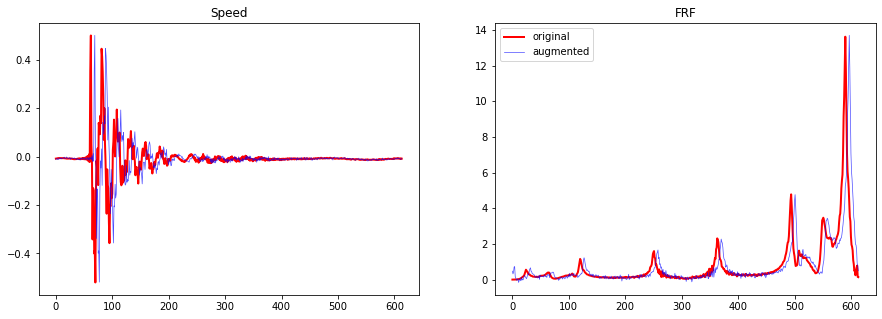

(5390, 614, 2)


In [122]:
# Define the number of augmentations to perform
num_augmentations = 2
classe = 2
augmented_data_2, augmented_labels, index_augmented = data_augmentation(data_2, classe * np.ones(data_2.shape[0]), num_augmentations)

# check number of new data
print(len(augmented_data_2),len(augmented_labels))

################## Plotting #####################

# Number of features
columns = ["Speed", "FRF"]
num_features = 2
index = 0         # index of original sample to plot
n_augmented = 1   # number of augmentated samples

# Plot original sample in red
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()
for i in range(num_features):
    axs[i].plot(data_2[index][:, i], 'r', linewidth=2, label="original")
    axs[i].set_title(str(columns[i]))

# Plot augmented samples in blue
for i in range(0, data_2.shape[0]*n_augmented, index+data_2.shape[0]):
# for i in [150]:
    for j in range(num_features):
        axs[j].plot(augmented_data_2[i][:, j], 'b', linewidth=0.7, alpha=0.7, label="augmented")
plt.legend()
plt.show()

################## Preprocessing #####################
# delete duplicates
augmented_data_2 = np.delete(augmented_data_2, index_augmented, axis=0)

# Concatenate original dataset + augmented
data_augmented_2 = np.concatenate((data_2, augmented_data_2))[:4000]
labels_augmented_2 = classe * np.ones(data_augmented_2.shape[0])

print(data_augmented_2.shape)

5425 5425


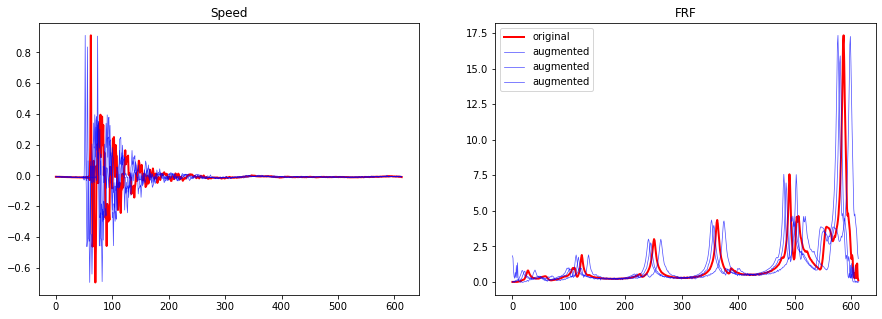

(4000, 614, 2)

In [128]:
# Define the number of augmentations to perform
num_augmentations = 25
classe = 3
augmented_data_3, augmented_labels, index_augmented = data_augmentation(data_3, classe * np.ones(data_3.shape[0]), num_augmentations)

# check number of new data
print(len(augmented_data_3),len(augmented_labels))

################## Plotting #####################

# Number of features
columns = ["Speed", "FRF"]
num_features = 2
index = 0         # index of original sample to plot
n_augmented = 3   # number of augmentated samples

# Plot original sample in red
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()
for i in range(num_features):
    axs[i].plot(data_3[index][:, i], 'r', linewidth=2, label="original")
    axs[i].set_title(str(columns[i]))

# Plot augmented samples in blue
for i in range(0, data_3.shape[0]*n_augmented, index+data_3.shape[0]):
# for i in [150]:
    for j in range(num_features):
        axs[j].plot(augmented_data_3[i][:, j], 'b', linewidth=0.7, alpha=0.7, label="augmented")
plt.legend()
plt.show()

################## Preprocessing #####################
# delete duplicates
augmented_data_3 = np.delete(augmented_data_3, index_augmented, axis=0)

# Concatenate original dataset + augmented
data_augmented_3 = np.concatenate((data_3, augmented_data_3))[:4000]
labels_augmented_3 = classe * np.ones(data_augmented_3.shape[0])

data_augmented_3.shape

5460 5460


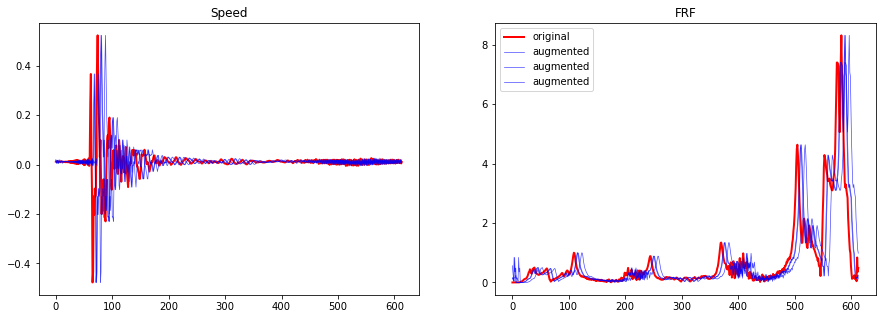

(4000, 614, 2)

In [129]:
# Define the number of augmentations to perform
num_augmentations = 130
classe = 4
augmented_data_4, augmented_labels, index_augmented = data_augmentation(data_4, classe * np.ones(data_4.shape[0]), num_augmentations)

# check number of new data
print(len(augmented_data_4),len(augmented_labels))

################## Plotting #####################

# Number of features
columns = ["Speed", "FRF"]
num_features = 2
index = 0         # index of original sample to plot
n_augmented = 3   # number of augmentated samples

# Plot original sample in red
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()
for i in range(num_features):
    axs[i].plot(data_4[index][:, i], 'r', linewidth=2, label="original")
    axs[i].set_title(str(columns[i]))

# Plot augmented samples in blue
for i in range(0, data_4.shape[0]*n_augmented, index+data_4.shape[0]):
# for i in [150]:
    for j in range(num_features):
        axs[j].plot(augmented_data_4[i][:, j], 'b', linewidth=0.7, alpha=0.7, label="augmented")
plt.legend()
plt.show()

################## Preprocessing #####################
# delete duplicates
augmented_data_4 = np.delete(augmented_data_4, index_augmented, axis=0)

# Concatenate original dataset + augmented
data_augmented_4 = np.concatenate((data_4, augmented_data_4))[:4000]
labels_augmented_4 = classe * np.ones(data_augmented_4.shape[0])

data_augmented_4.shape

In [125]:
df_data.groupby(["Niveau"])["Exploitable"].value_counts()/df_data.groupby(["Niveau"])["Exploitable"].count()*100

Niveau  Exploitable
0.0     1.0            97.020393
        0.0             2.979607
1.0     1.0            96.231911
        0.0             3.768089
2.0     1.0            89.362583
        0.0            10.637417
3.0     0.0            70.273973
        1.0            29.726027
4.0     0.0            92.265193
        1.0             7.734807
Name: Exploitable, dtype: float64

In [375]:
# clustering using kmeans and Dynamic Time Warping-DTW
# we are going to analise the performance of the clusterization for univariate time series feature and multivariate in a further approach. 

# model_speed = []
# cluster_labels = []
# for i in np.arange(2,5,9):
#     model_speed.append(TimeSeriesKMeans(n_clusters=i, 
#                                         metric="dtw", 
#                                         max_iter=10))
#     cluster_labels.append(model_speed[i-2].fit_predict(np_features))

## multivariate features
## preprocessing data - scaling
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

In [376]:
# based only on speed data
model_speed_01 = TimeSeriesKMeans(n_clusters=3, 
                                  metric="dtw", 
                                  max_iter=10)
cluster_labels_01 = model_speed_01.fit_predict(np_vitesse[:200])

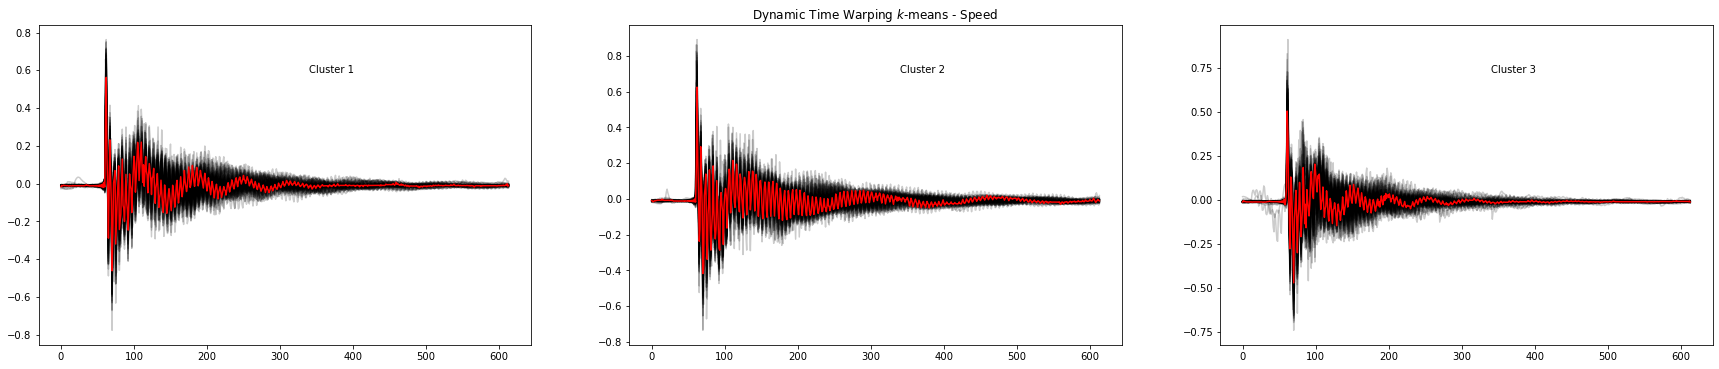

In [377]:
nb_clusters = 3
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in np_vitesse[:200][cluster_labels_01 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_01.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

In [378]:
print(np. unique((cluster_labels_01), return_counts=True))

(array([0, 1, 2]), array([64, 59, 77]))


In [379]:
rnd_indices = np.arange(len(np_vitesse))
np.random.shuffle(rnd_indices)
print(len(rnd_indices))
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]

22520


In [380]:
# based only on speed data DTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
model_speed_02 = TimeSeriesKMeans(n_clusters=9, 
                                  metric="dtw", 
                                  max_iter=10)
cluster_labels_02 = model_speed_02.fit_predict(Xtrain)

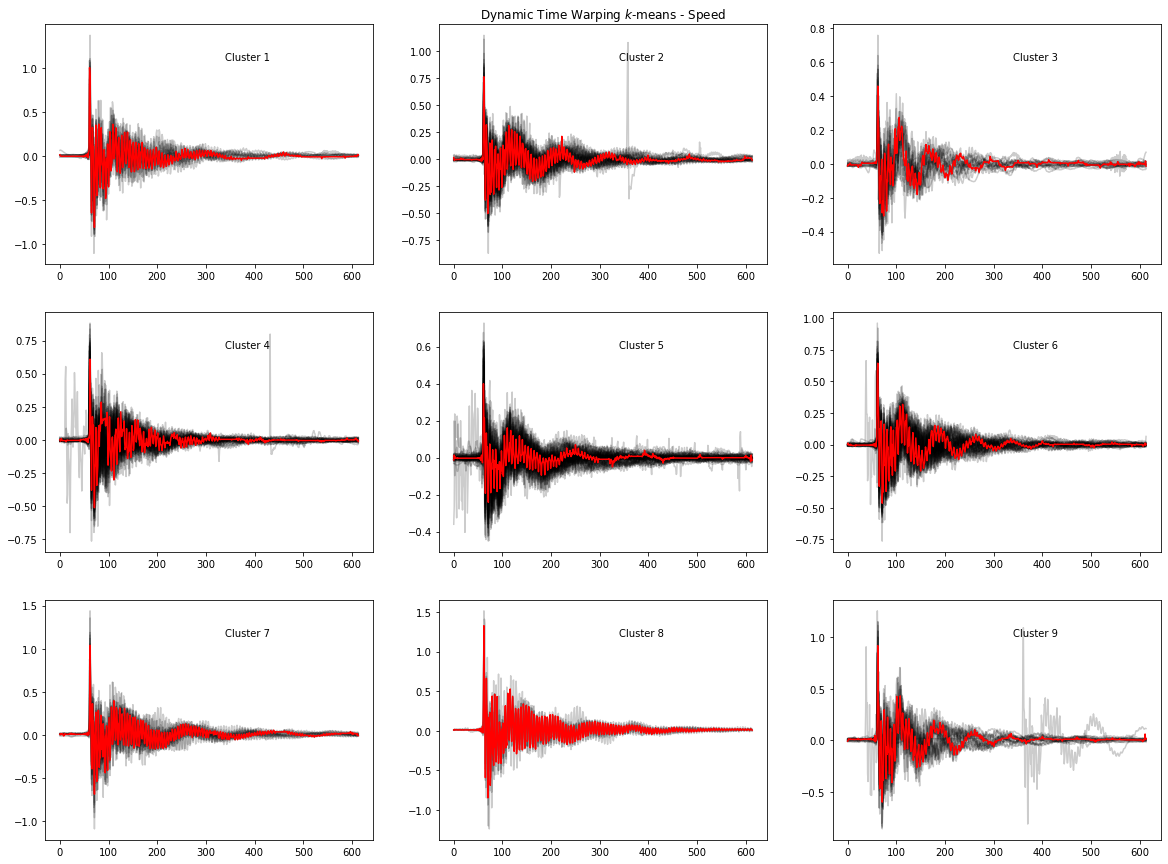

In [381]:
nb_clusters = 9
plt.figure(figsize=(20,15))
for yi in range(nb_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in Xtrain[cluster_labels_02 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_02.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

In [382]:
cluster_labels_022 = model_speed_02.predict(np_vitesse)
print(np. unique((cluster_labels_022), return_counts=True))
print(len(cluster_labels_022))

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 22520 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([1304, 2928, 2099, 3170, 5149, 4372, 1352,  411, 1735]))
22520


In [383]:
def plot_cluster_counts(cluster_labels):
    value_counts = np. unique((cluster_labels), return_counts=True)
    plt.bar(value_counts[0], value_counts[1]/np.sum(value_counts[1])*100)
    plt.xlabel("Clusters")
    plt.ylabel("Counts as percentage of total samples [%]")
    plt.title("Number of samples in each cluster - DTW k-means")

Inexplotable Data:  24.69 %


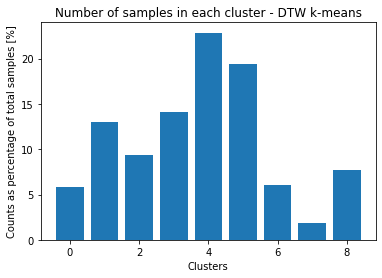

In [384]:
plot_cluster_counts(cluster_labels_022)
value_counts = np. unique((cluster_labels_022), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[4,7]])), "%")

# Based only on speed data DTW - 9 clusters

In [385]:
# based only on speed data DTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
model_speed_9_200 = TimeSeriesKMeans(n_clusters=9, 
                                    metric="dtw", 
                                    max_iter=10)
cluster_labels_9_200 = model_speed_9_200.fit_predict(Xtrain)

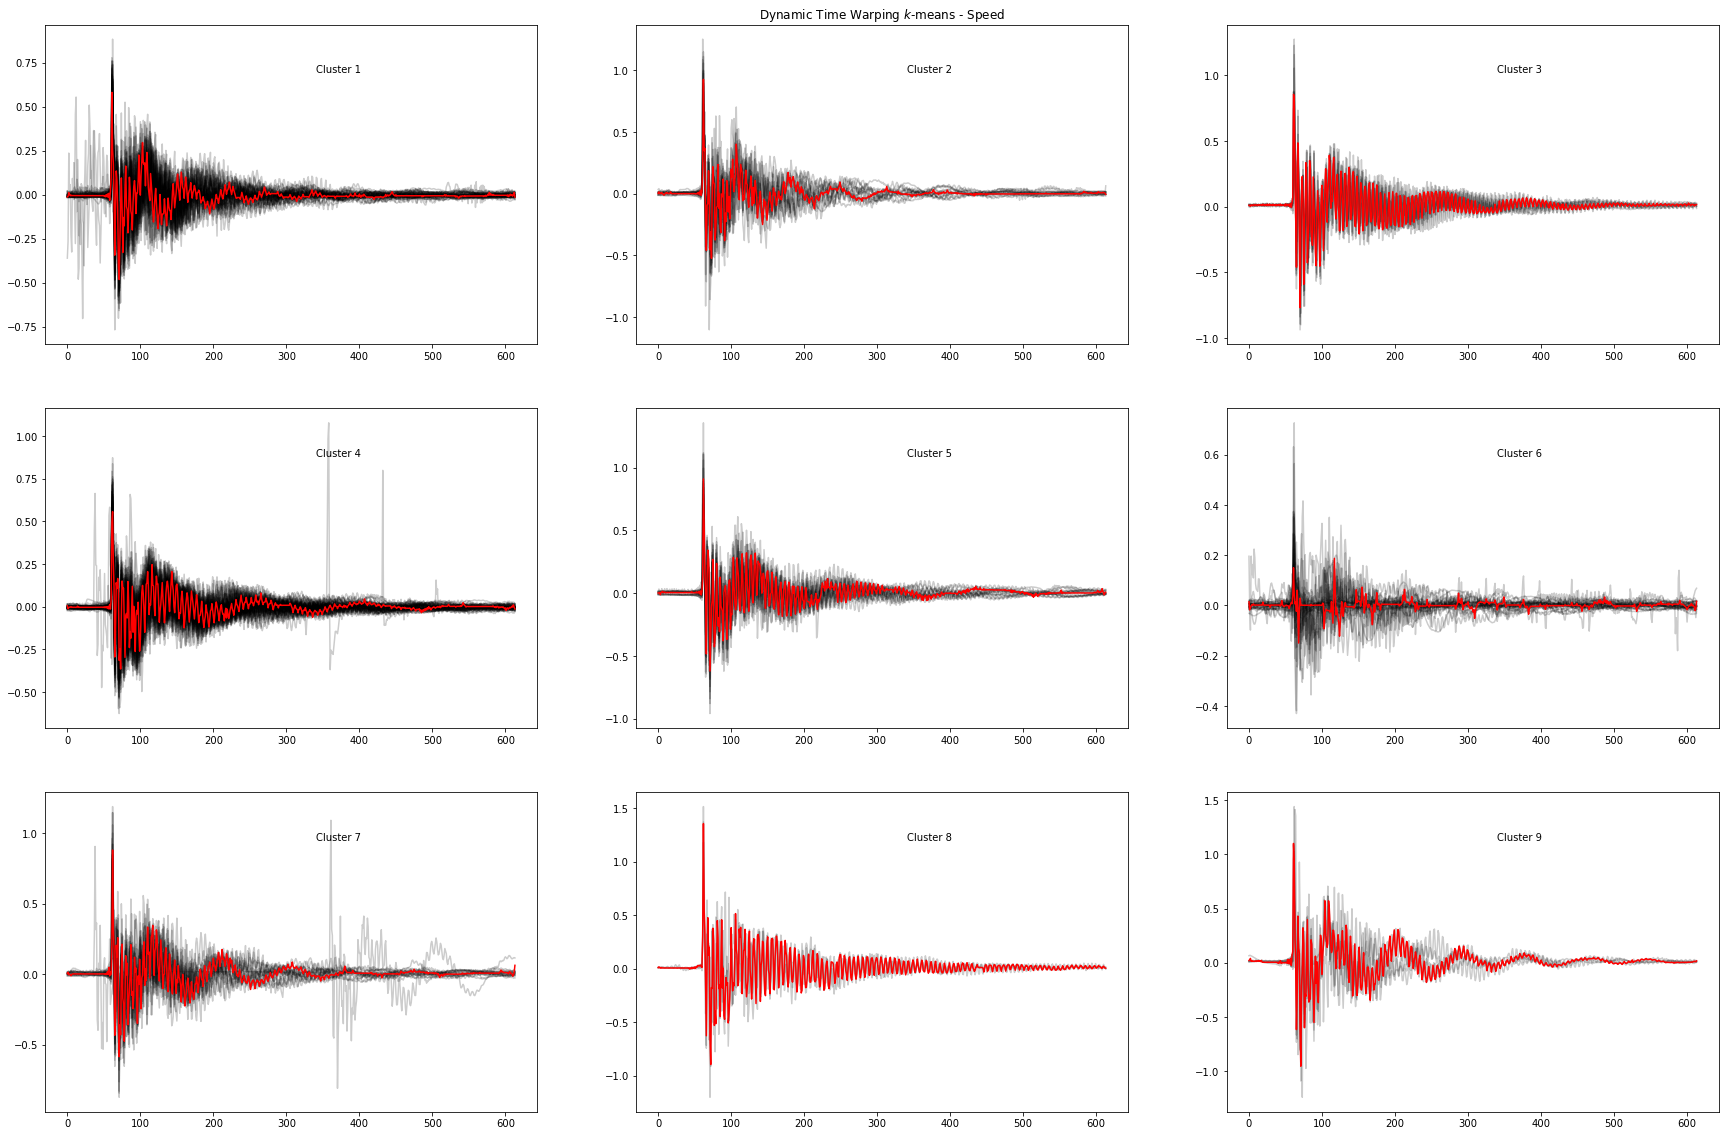

In [386]:
nb_clusters = 9
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in Xtrain[cluster_labels_9_200 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_9_200.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 5000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Inexplotable Data:  3.44 %


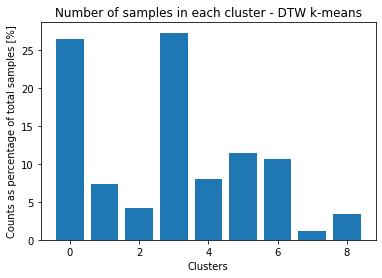

In [387]:
cluster_labels = model_speed_9_200.predict(np_vitesse[rnd_indices][:5000])
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[8]])), "%")

# Based only on speed data DTW - 18 clusters

In [388]:
# based only on speed data DTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
model_speed_18_200 = TimeSeriesKMeans(n_clusters=18, 
                                    metric="dtw", 
                                    max_iter=10)
cluster_labels_18_200 = model_speed_18_200.fit_predict(Xtrain)

In [389]:
cluster_labels_18_200_full_pred = model_speed_18_200.predict(np_vitesse[:2000])

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


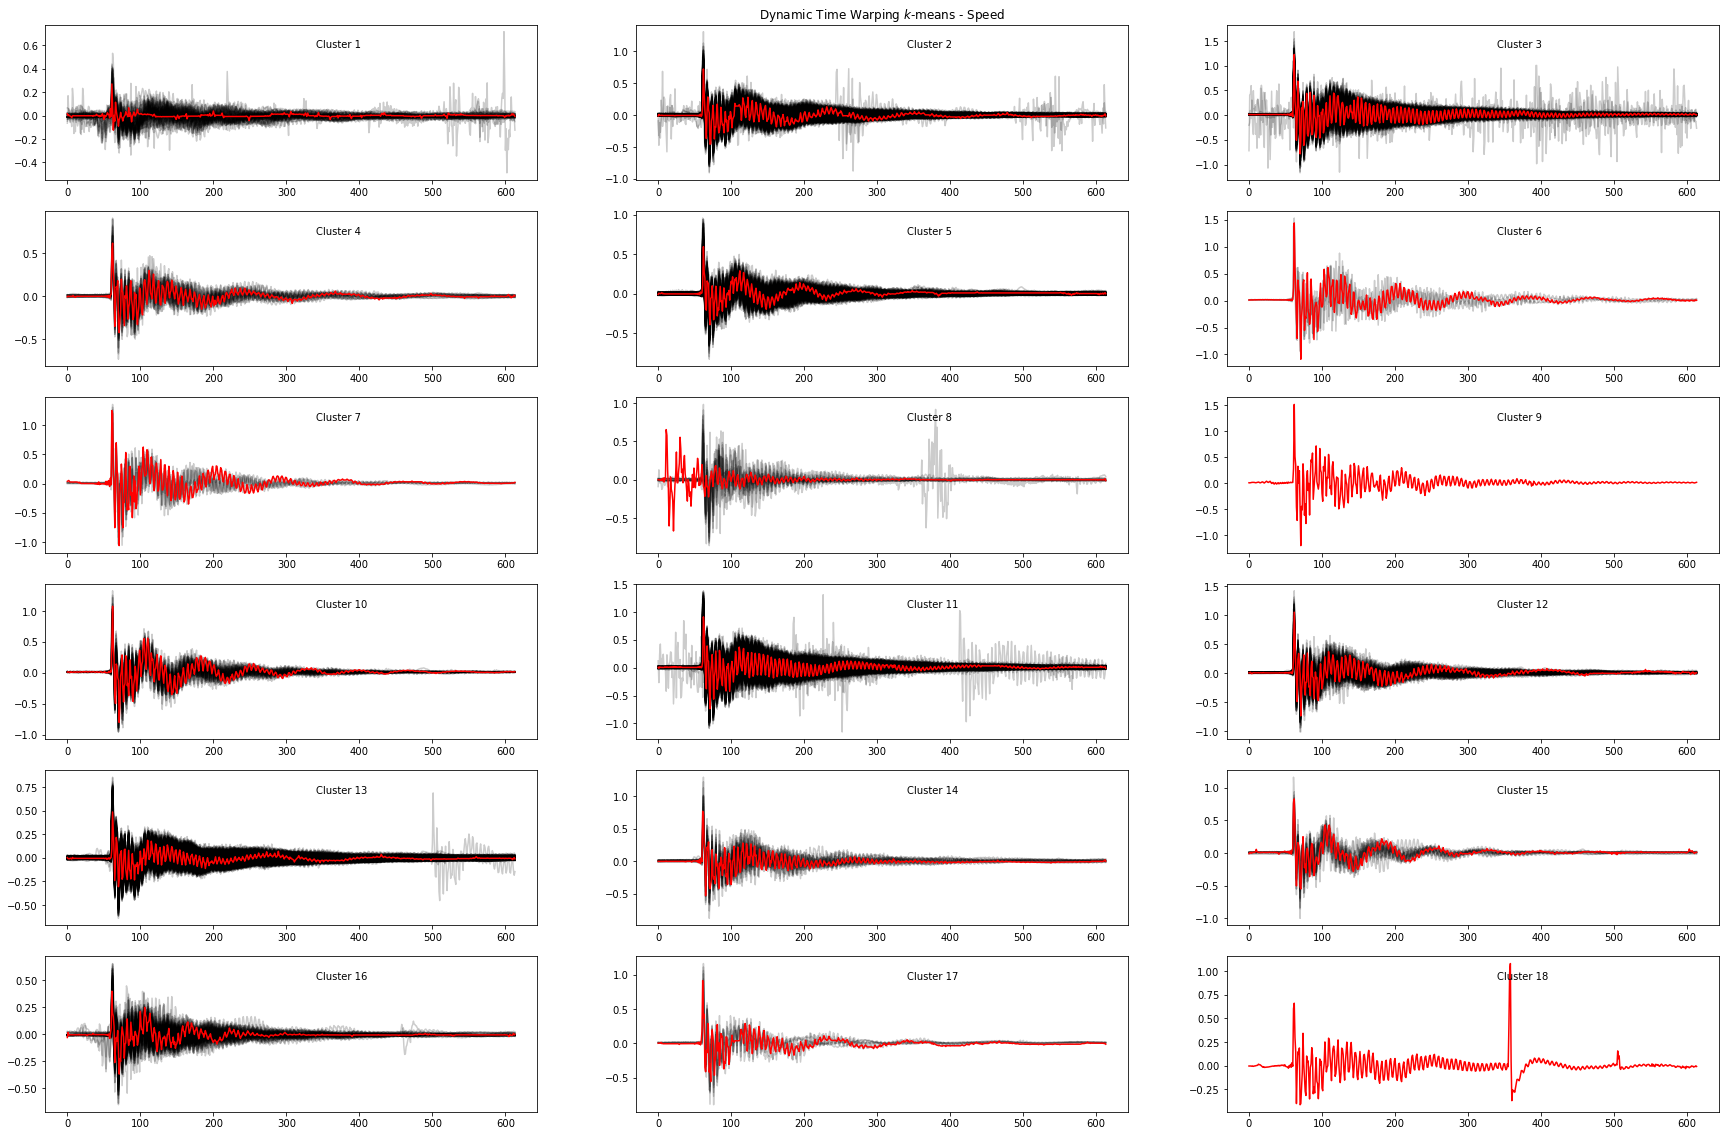

In [390]:
nb_clusters = 18
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(int(nb_clusters/3), 3, yi + 1)
    for xx in np_vitesse[:2000][cluster_labels_18_200_full_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_18_200.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 5000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Inexplotable Data:  23.42 %


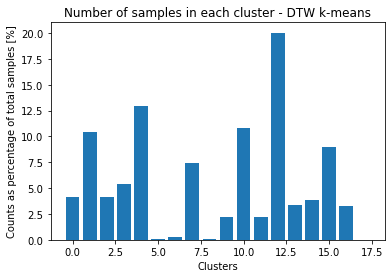

In [391]:
cluster_labels = model_speed_18_200.predict(np_vitesse[:5000])
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[12,13]])), "%")

In [392]:
print(np. unique((cluster_labels_18_200_full_pred == 13), return_counts=True))
print(np. unique(cluster_labels_18_200_full_pred, return_counts=True))

(array([False,  True]), array([1985,   15]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16]), array([ 55, 307, 177,  17, 217,   3,   6,  13,  31, 439,  62, 550,  15,
        12,  90,   6]))


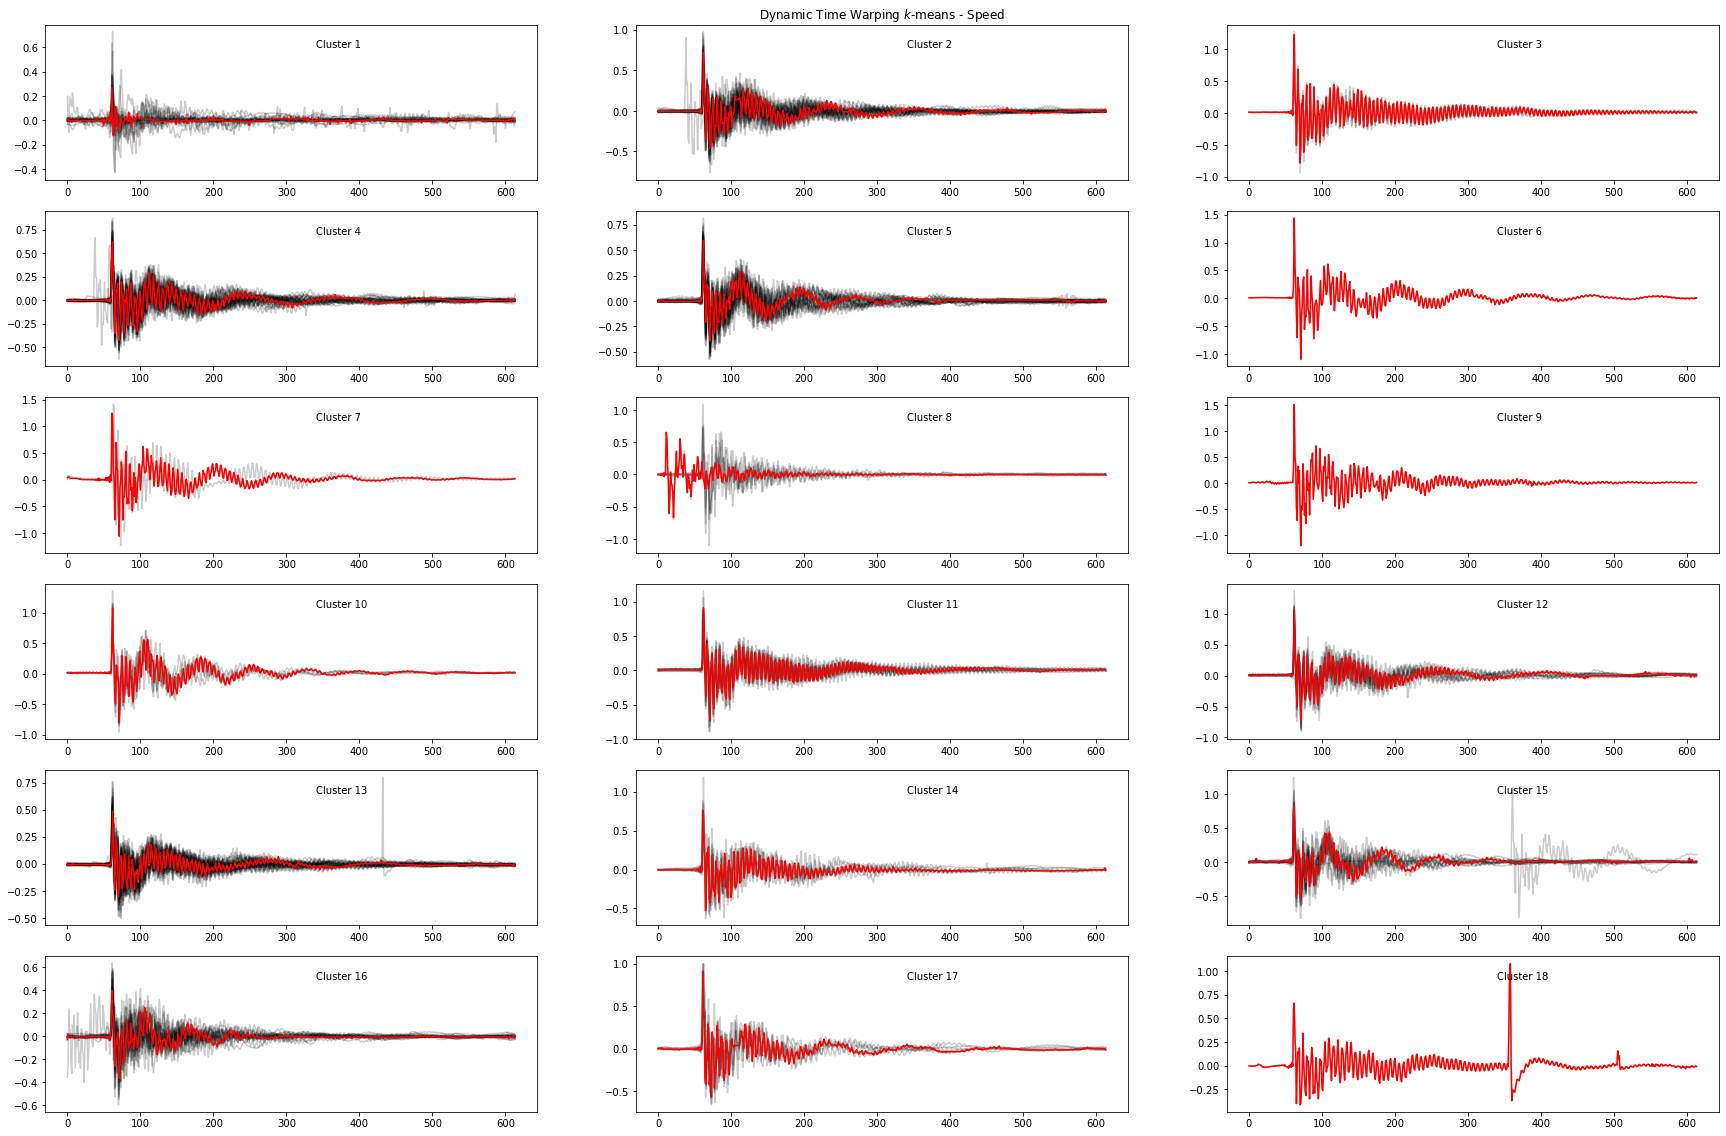

In [393]:
# same 18 clusters but only 200 data
nb_clusters = 18
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in Xtrain[cluster_labels_18_200 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_18_200.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

# based only on speed data SoftDTW - 18 clusters

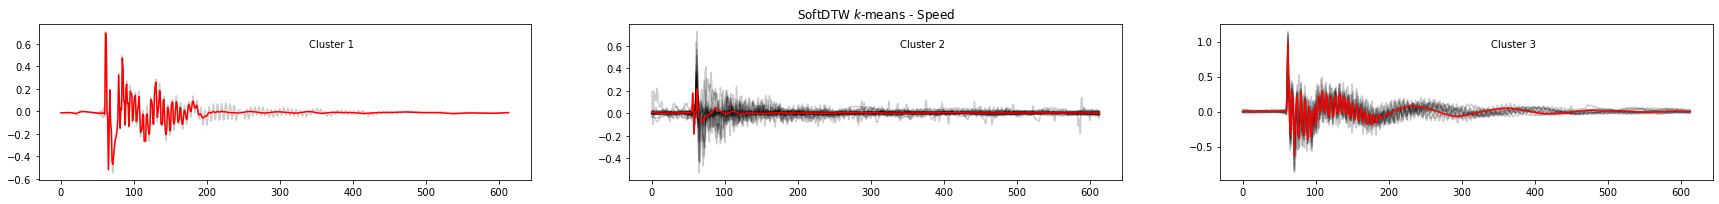

In [394]:
# based only on speed data SoftDTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
nb_clusters = 3
model_speed_03 = TimeSeriesKMeans(n_clusters=18, 
                                metric="softdtw",
                                metric_params={"gamma": .01}, 
                                max_iter=10,
                                random_state=seed,
                                )
cluster_labels_03 = model_speed_03.fit_predict(Xtrain)
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in Xtrain[cluster_labels_03 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_03.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("SoftDTW $k$-means - Speed")
    plt.show
    

# based only on frequency data DTW - 18 clusters

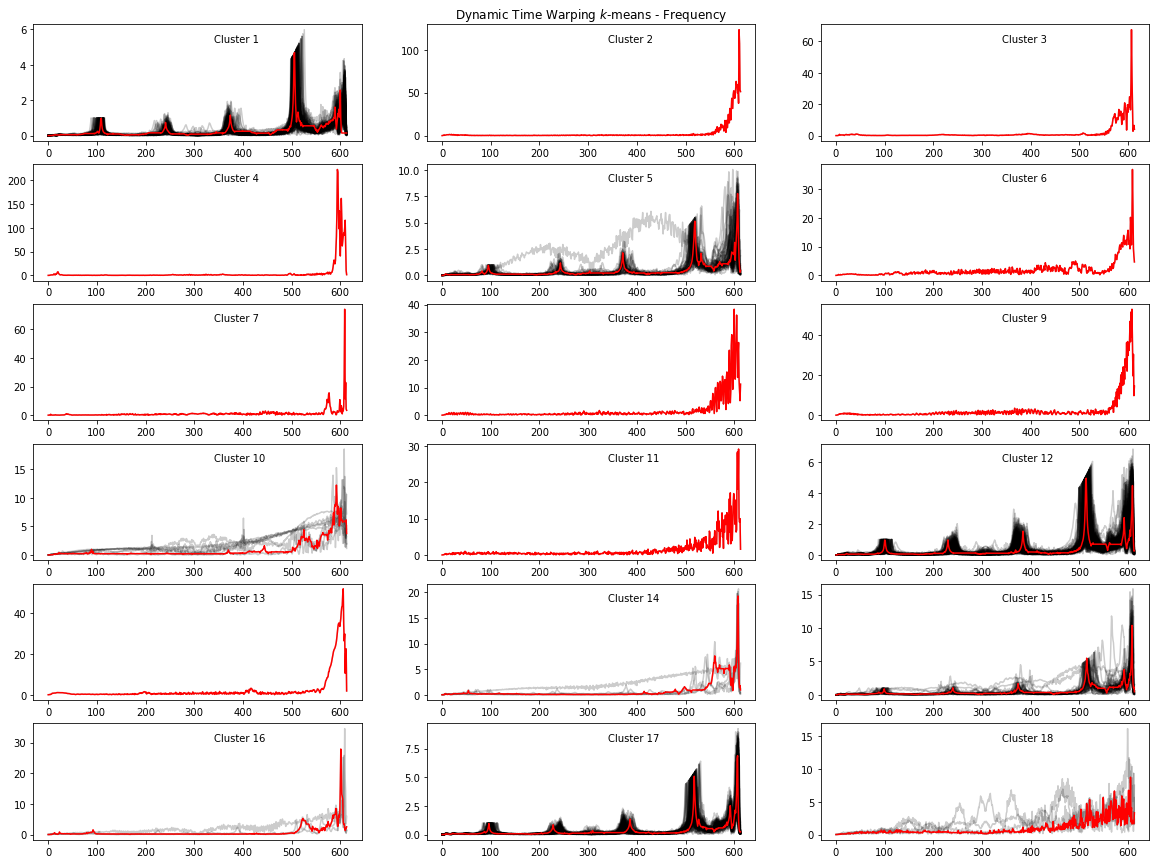

In [395]:
# based only on frequency data DTW
Xtrain = np_frf[rnd_indices]
Xtrain = Xtrain[:500]
model_speed_04 = TimeSeriesKMeans(n_clusters=18, 
                                  metric="dtw",
                                  max_iter=10,
                                  random_state=seed
                                 )
cluster_labels_04 = model_speed_04.fit_predict(Xtrain)

nb_clusters = 18
plt.figure(figsize=(20,15))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in Xtrain[cluster_labels_04 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_04.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Frequency")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 5000

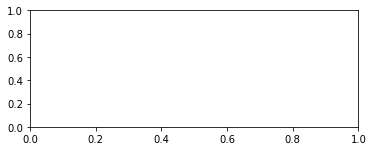

In [396]:
nb_clusters = 18
plt.figure(figsize=(20,15))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in np_frf[rnd_indices][:1000][cluster_labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_04.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Frequency")

In [ ]:
cluster_labels = model_speed_04.predict(np_frf[rnd_indices][:1000])

In [ ]:
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)

In [ ]:
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[0,2,6,8,10,14,17]])), "%")

In [ ]:
print(np.unique(cluster_labels_18_200_full_pred, return_counts=True))

# based on speed and frequency data DTW

In [455]:
# based only on speed and frequency data DTW
# multivariate features
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Use the np_vitesse and np_frf data to create a time series dataset
nb_clusters=9
# X = to_time_series_dataset([np_vitesse, np_frf])
X_rnd = np_features[rnd_indices][:10000]

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_rnd)

# Create a TimeSeriesKMeans instance with 18 clusters
kmeans_2_features = TimeSeriesKMeans(n_clusters=18, random_state=seed)

# Fit the model to the data
cluster_labels_ = kmeans_2_features.fit_predict(X_scaled)

# Get the cluster centers
cluster_centers_2_features = kmeans_2_features.cluster_centers_
cluster_centers_2_features.shape

(18, 614, 2)

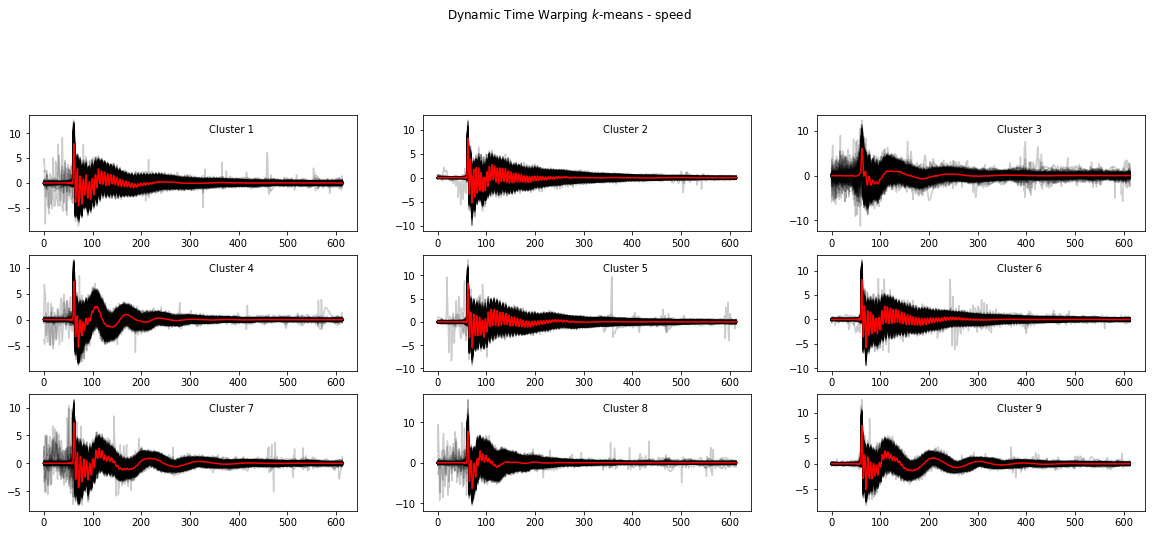

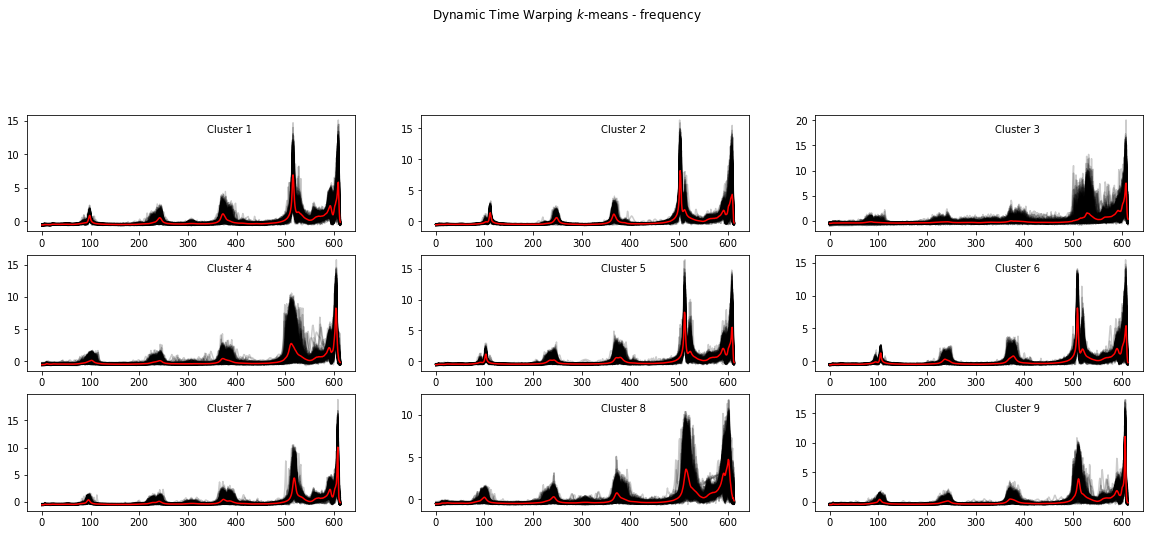

In [456]:
title_=["speed", "frequency"]
for i in range(2):
    plt.figure(figsize=(20,15))
    for yi in range(nb_clusters):
        plt.subplot(6, 3, yi + 1)
        for xx in X_scaled[cluster_labels_ == yi][:,:,i]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(cluster_centers_2_features[yi][:,i].ravel(), "r-")
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
    plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])

Inexplotable Data:  5.65 %


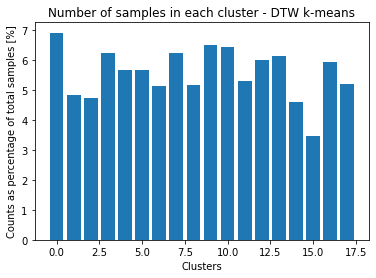

In [457]:
cluster_labels = cluster_labels_ #kmeans_2_features.predict(np_frf[rnd_indices][:5000])
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[5]])), "%")

In [458]:
np.unique((cluster_labels_), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([690, 482, 474, 622, 565, 565, 513, 621, 517, 649, 644, 528, 600,
        613, 458, 347, 594, 518]))

In [459]:
# cluster_labels_.shape
df_cluster=pd.DataFrame(cluster_labels_, rnd_indices[:10000], columns=["cluster"]).sort_index()
df=df_data.iloc[rnd_indices[:10000]].sort_index()

# Part II. Only Class 0 and shorter

In [248]:
class_0_indices = df_data["Niveau"]==0
np_features_2 = np_features[class_0_indices,:450,:]
np_features_2.shape

(8189, 450, 2)

In [249]:
# based on speed and frequency data DTW
# multivariate features
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Use the np_vitesse and np_frf data to create a time series dataset
# X = to_time_series_dataset(np.append(np_vitesse, np_frf))
X_rnd = np_features_2

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_rnd)

In [250]:
# Create a TimeSeriesKMeans instance with 2,4 clusters
kmeans_2_features_2 = TimeSeriesKMeans(n_clusters=9, random_state=seed)

# Fit the model to the data
cluster_labels_ = kmeans_2_features_2.fit_predict(X_scaled)

# Get the cluster centers
cluster_centers_2_features = kmeans_2_features_2.cluster_centers_
print(cluster_centers_2_features.shape)

(9, 450, 2)


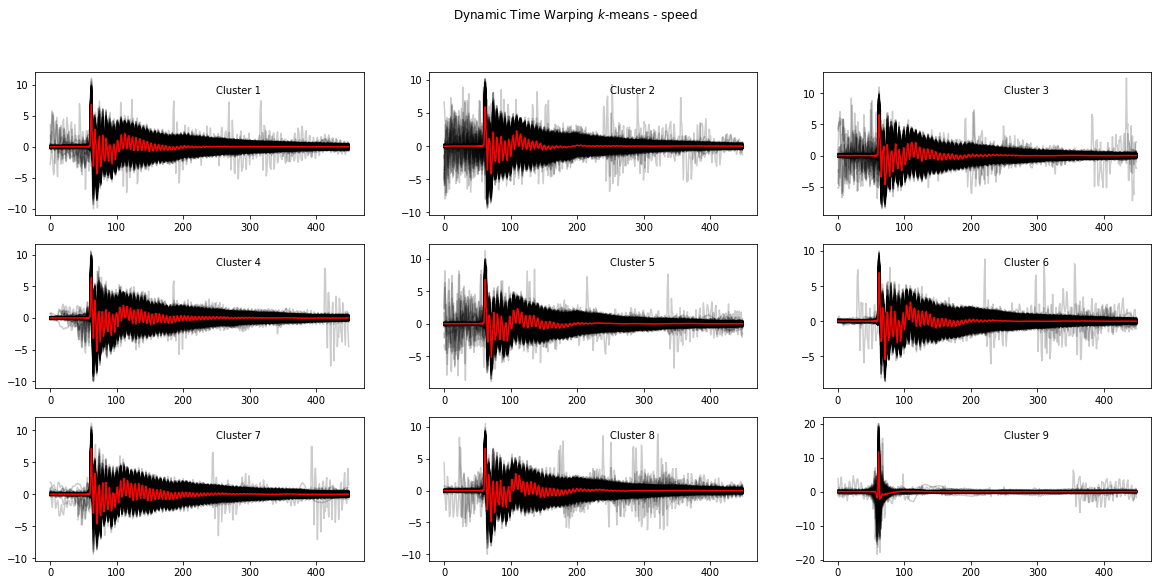

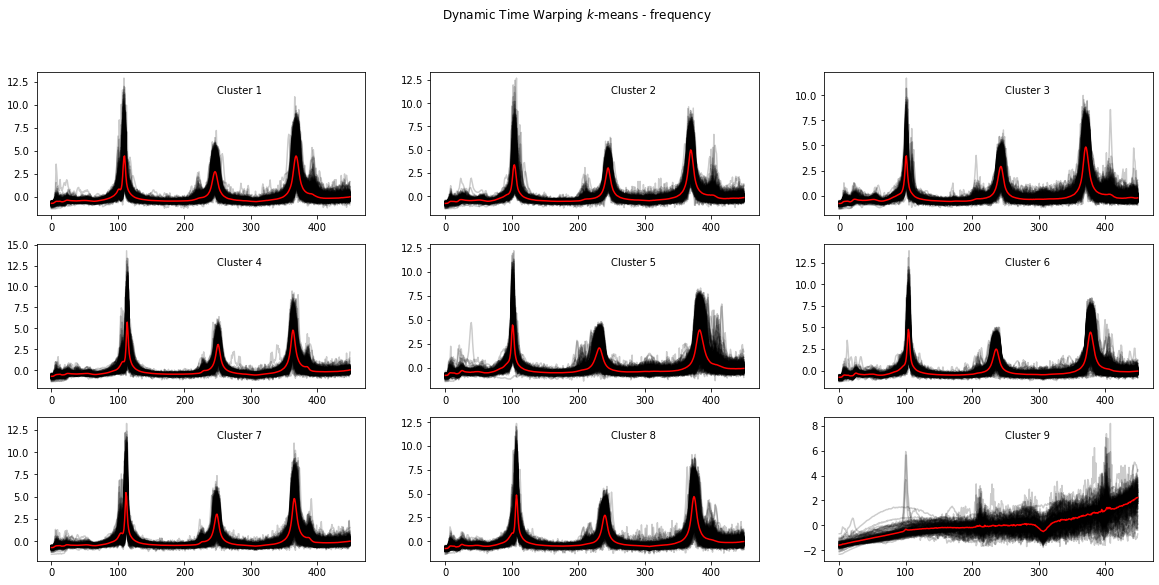

In [251]:
nb_clusters = 9
ttitle_=["speed", "frequency"]
for i in range(2):
    plt.figure(figsize=(20,nb_clusters))
    for yi in range(nb_clusters):
        plt.subplot(int(nb_clusters/3), 3, yi + 1)
        for xx in X_scaled[cluster_labels_ == yi][:,:,i]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(cluster_centers_2_features[yi][:,i].ravel(), "r-")
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
    plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])

Inexplotable Data:  1.45 %
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([1035,  804, 1008, 1030,  825, 1042, 1217, 1109,  119]))


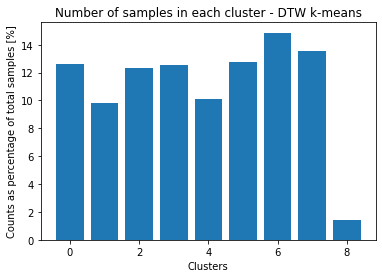

In [252]:
cluster_labels_p2 = cluster_labels_ #kmeans_2_features.predict(np_frf[rnd_indices][:5000])
plot_cluster_counts(cluster_labels_p2)
value_counts = np. unique((cluster_labels_p2), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[8]])), "%")
print(np.unique((cluster_labels_p2), return_counts=True))

In [253]:
nb_clusters = 3 #clusters
# based on speed and frequency data DTW
# multivariate features
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Use the np_vitesse and np_frf data to create a time series dataset
X_rnd = np_features_2

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_rnd)

# Create a TimeSeriesKMeans instance with 2,4 clusters
kmeans_2_features_2 = TimeSeriesKMeans(n_clusters=nb_clusters, random_state=seed)

# Fit the model to the data
cluster_labels_ = kmeans_2_features_2.fit_predict(X_scaled)

# Get the cluster centers
cluster_centers_2_features = kmeans_2_features_2.cluster_centers_
print(cluster_centers_2_features.shape)

(3, 450, 2)


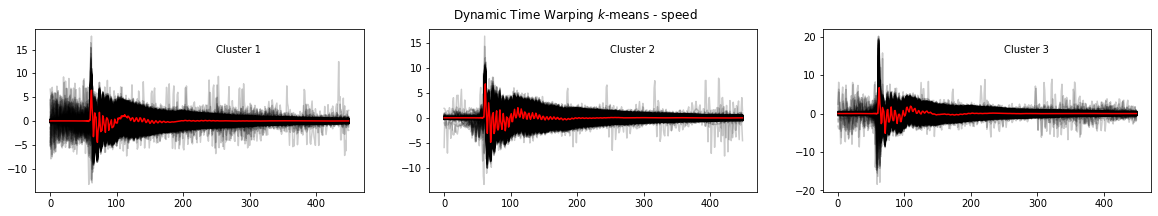

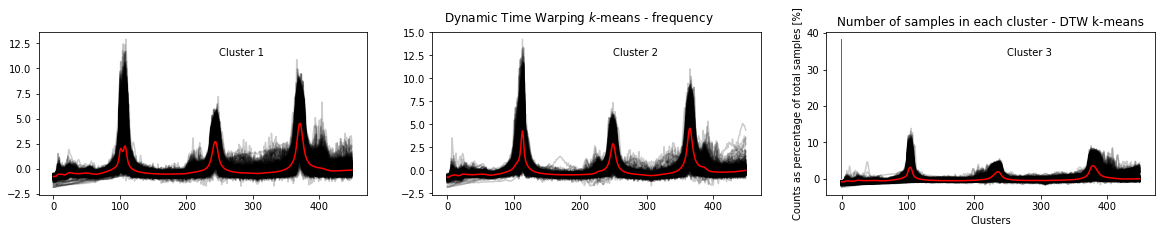

In [254]:
ttitle_=["speed", "frequency"]
for i in range(2):
    plt.figure(figsize=(20,3))
    for yi in range(nb_clusters):
        plt.subplot(int(nb_clusters/3), 3, yi + 1)
        for xx in X_scaled[cluster_labels_ == yi][:,:,i]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(cluster_centers_2_features[yi][:,i].ravel(), "r-")
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
    plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])

cluster_labels = cluster_labels_ #kmeans_2_features.predict(np_frf[rnd_indices][:5000])
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)

Smaller Peaks Data:  28.66 %
(array([0, 1, 2]), array([3140, 2702, 2347]))


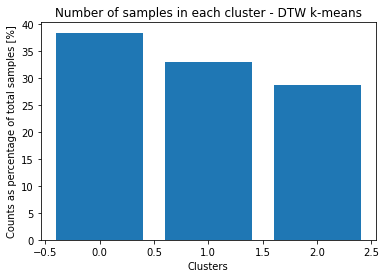

In [255]:
plot_cluster_counts(cluster_labels)
value_counts = np.unique((cluster_labels), return_counts=True)
print("Smaller Peaks Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[2]])), "%")
print(np.unique((cluster_labels_), return_counts=True))

# Removing and training with 6 clusters and 2 clusters

In [400]:
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.signal import find_peaks

In [445]:
class_0_indices = df_data["Niveau"]==0
np_features_2 = np_features[class_0_indices,:450,:]
np_features_2.shape
# Removing noise from samples
inex_indices = cluster_labels_p2 == 8     # cluster 8 is the noisy one in the 18 clusterization
np_features_3 = np_features_2[~inex_indices]

In [446]:
def TimeSeriesKMeans_results(nb_clusters, clusters):

    # based on speed and frequency data DTW
    # multivariate features
    from tslearn.utils import to_time_series_dataset
    from tslearn.preprocessing import TimeSeriesScalerMeanVariance

    # Use the np_vitesse and np_frf data to create a time series dataset
    X_rnd = np_features_3

    # Normalize the data
    scaler = TimeSeriesScalerMeanVariance()
    X_scaled = scaler.fit_transform(X_rnd)

    # Create a TimeSeriesKMeans instance with 2,4 clusters
    kmeans_2_features_3 = TimeSeriesKMeans(n_clusters=nb_clusters, random_state=seed)

    # Fit the model to the data
    cluster_labels_ = kmeans_2_features_3.fit_predict(X_scaled)

    # Get the cluster centers
    cluster_centers_2_features = kmeans_2_features_3.cluster_centers_
    print(cluster_centers_2_features.shape)

    ttitle_=["speed", "frequency"]
    for i in range(2):
        plt.figure(figsize=(20,nb_clusters))
        for yi in range(nb_clusters):
            plt.subplot(max(int(nb_clusters/3),1), 3, yi + 1)
            for xx in X_scaled[cluster_labels_ == yi][:,:,i]:
                plt.plot(xx.ravel(), "k-", alpha=.2)
            plt.plot(cluster_centers_2_features[yi][:,i].ravel(), "r-")
            plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                     transform=plt.gca().transAxes)
        plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])
        plt.show()

    plot_cluster_counts(cluster_labels_) #kmeans_2_features.predict(np_frf[rnd_indices][:5000])
    value_counts = np.unique((cluster_labels_), return_counts=True)
    print("Smaller Peaks Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[clusters]])), "%")
    print(np.unique((cluster_labels_), return_counts=True))

    peaks_values, distances = [], []

    plt.figure(figsize=(20,nb_clusters+1))
    for yi in range(nb_clusters):
        plt.subplot(max(int(nb_clusters/3),1), 3, yi + 1)

        # Generate some time series data
        data = cluster_centers_2_features[yi][:,1].flatten()

        # Find the peaks in the data
        peaks, _ = find_peaks(data, distance=100, height=0.01)

        # Plot the data
        plt.plot(data)

        # Plot the peaks
        plt.scatter(peaks, data[peaks], c='r')
        [plt.axvline(peak, color='r', linestyle='--') for peak in peaks]

        # Add title
        plt.title("Frequency FRF")

        # Calculate the distance between the peaks
        peak_distances = [peaks[i+1] - peaks[i] for i in range(len(peaks)-1)]

        # Save the peaks values and the distances
        peaks_values.append(data[peaks].tolist())
        distances.append(peak_distances)

        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
    plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])
    plt.show()

    x = [i for i in range(len(peaks_values[0]))]
    width = 0.1
    colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
    for i in range(len(peaks_values)):
        for j,val in enumerate(peaks_values[i]):
            plt.bar(x[j]+width*i, val, width=width, color=colors[i],alpha=0.7)
    plt.title("Peak Values")
    plt.show()

    x = [i for i in range(len(distances[0]))]
    for i in range(len(distances)):
        for j,val in enumerate(distances[i]):
            plt.barh(x[j]+width*i, val, height=width, color=colors[i], alpha=0.7)
    plt.title("Distance to first peak and between Peaks")
    plt.show()

    return peaks, distances

(2, 450, 2)


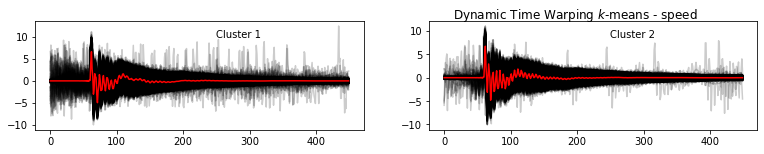

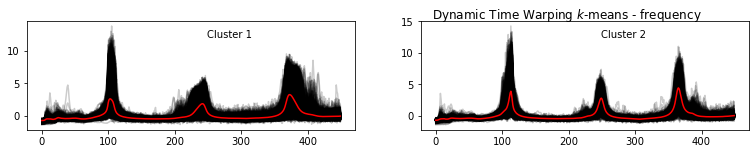

Smaller Peaks Data:  38.90 %
(array([0, 1]), array([4931, 3139]))


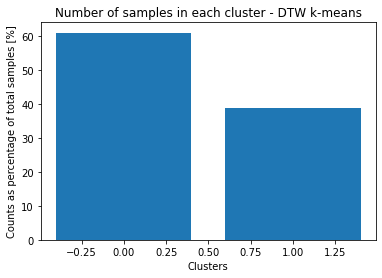

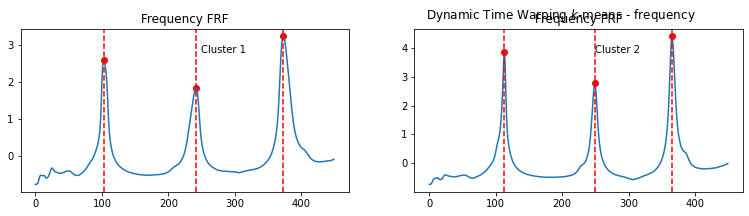

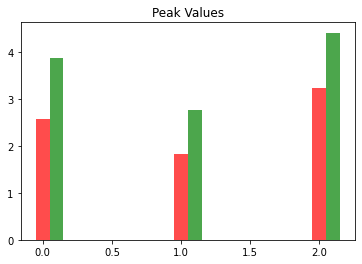

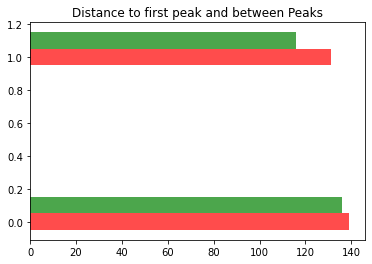

In [447]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=2, clusters=1)

(3, 450, 2)


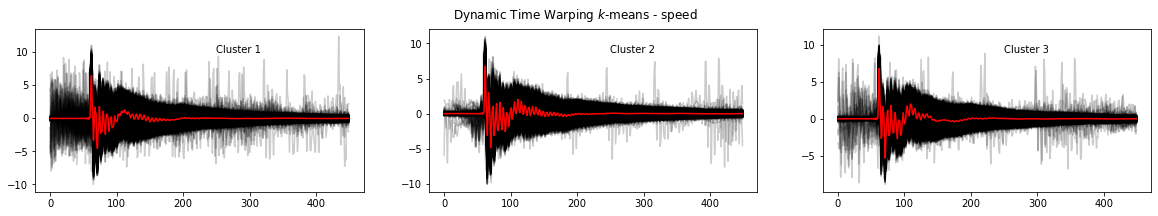

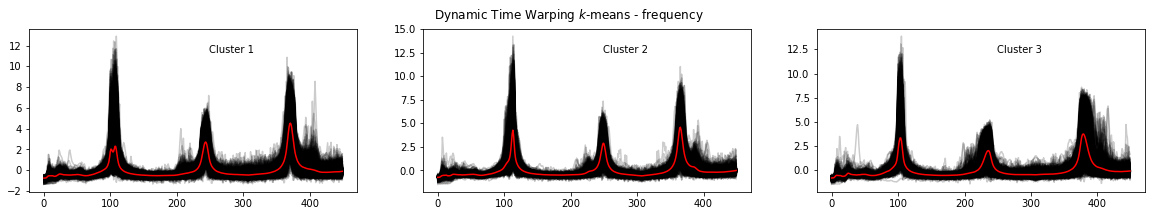

Smaller Peaks Data:  33.72 %
(array([0, 1, 2]), array([3144, 2721, 2205]))


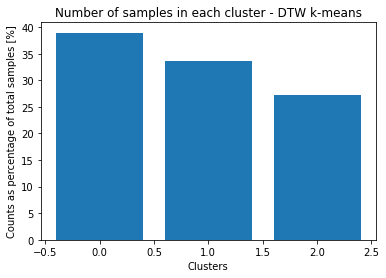

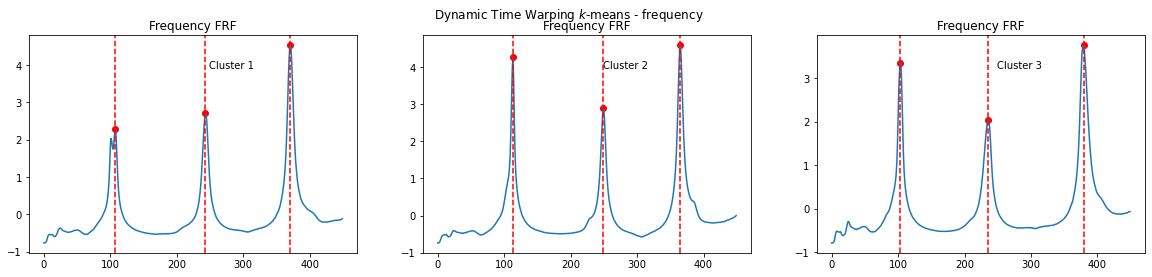

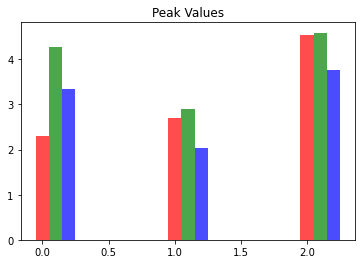

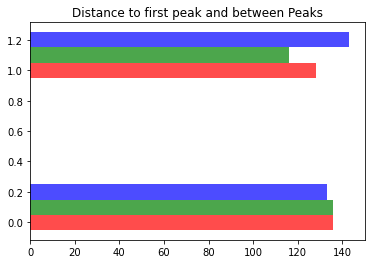

In [448]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=3, clusters=1)

(6, 450, 2)


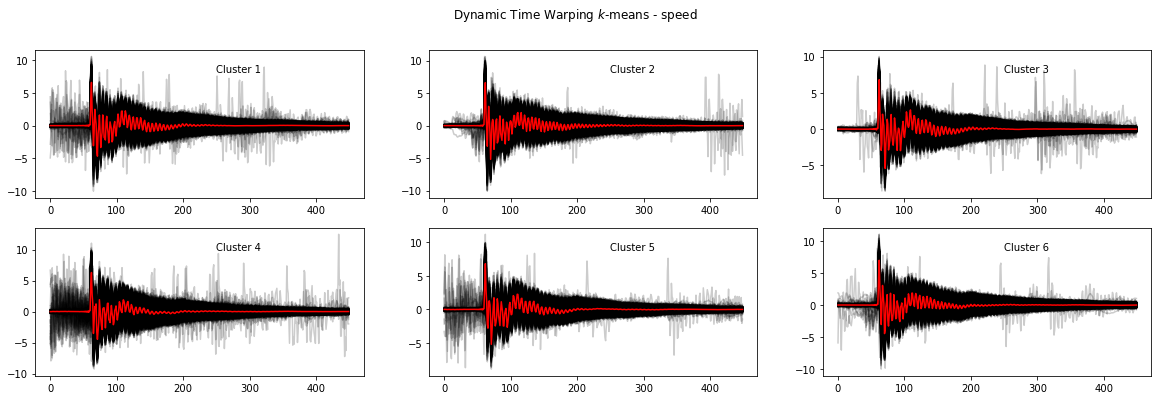

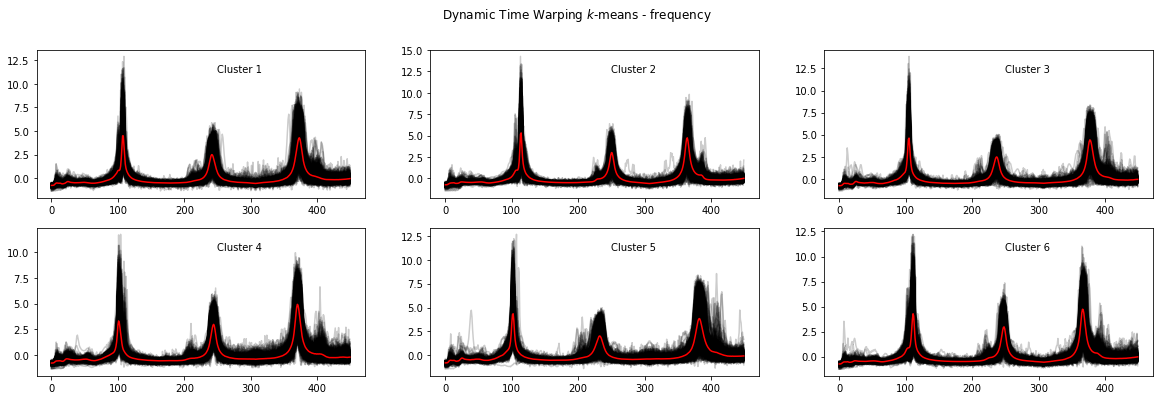

Smaller Peaks Data:  18.03 %
(array([0, 1, 2, 3, 4, 5]), array([1354, 1455, 1152, 1583,  988, 1538]))


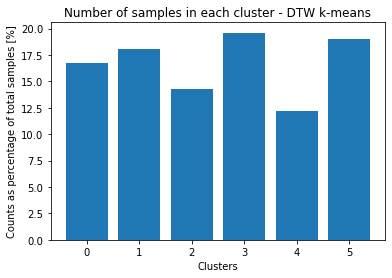

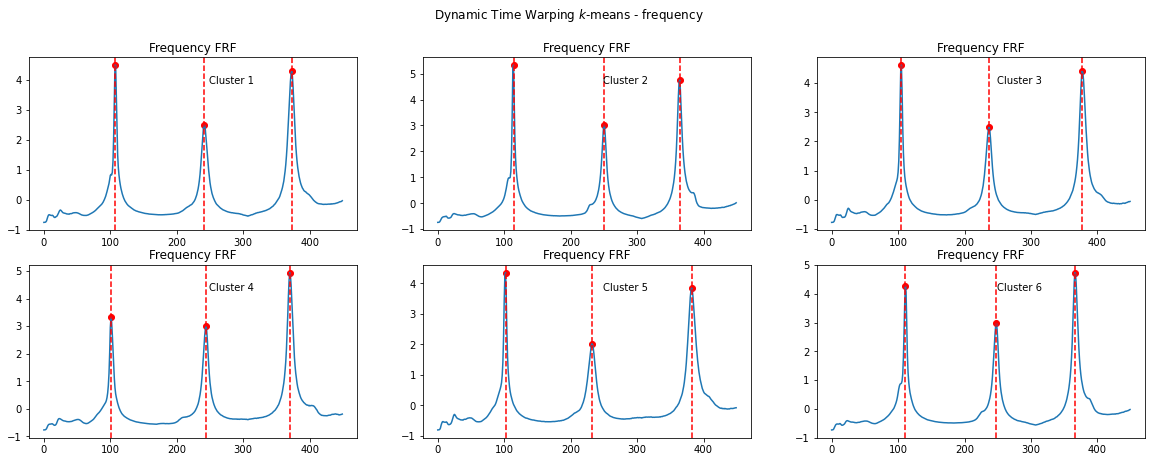

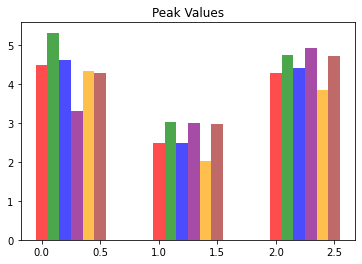

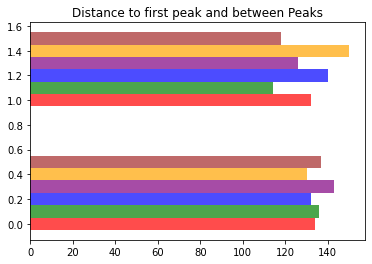

In [449]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=6, clusters=1)

In [460]:
class_0_indices = df_data["Niveau"]==0
np_features_2 = np_features[class_0_indices,:150,:]
np_features_2.shape
# Removing noise from samples
inex_indices = cluster_labels_p2 == 8     # cluster 8 is the noisy one in the 18 clusterization
np_features_3 = np_features_2[~inex_indices]

(2, 150, 2)


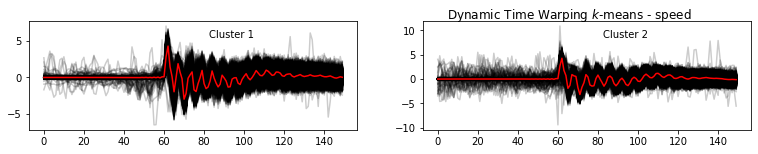

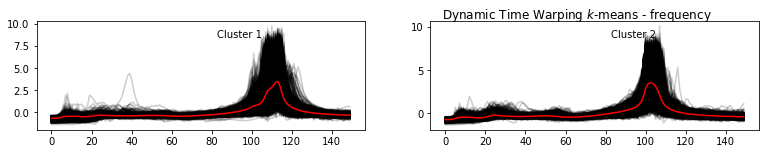

Smaller Peaks Data:  52.47 %
(array([0, 1]), array([3836, 4234]))


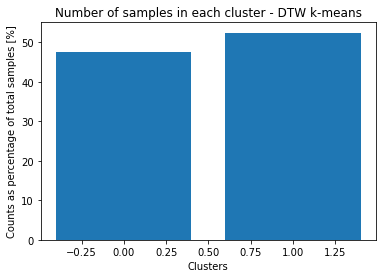

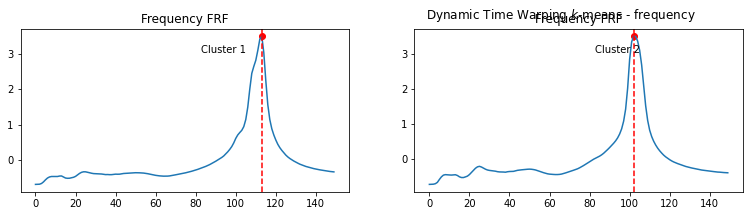

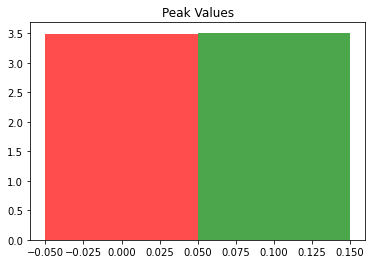

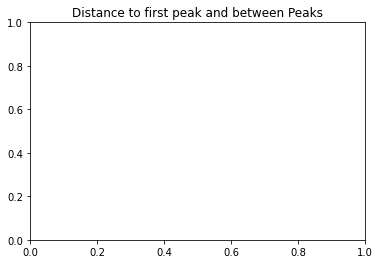

In [441]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=2, clusters=1)

(3, 150, 2)


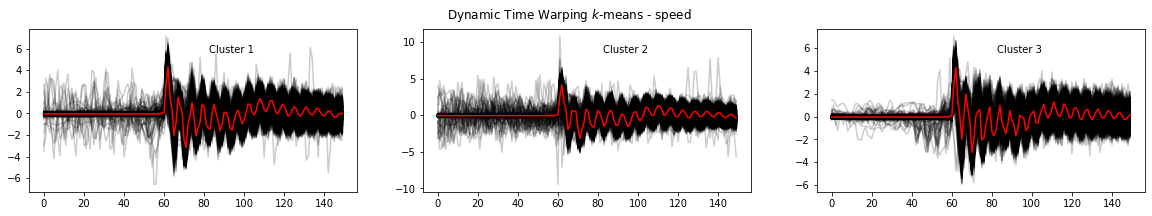

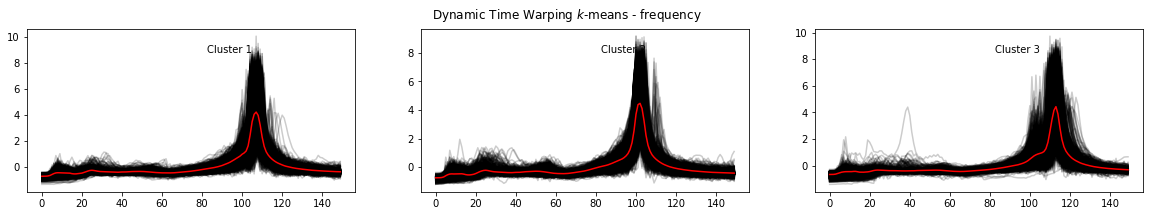

Smaller Peaks Data:  35.63 %
(array([0, 1, 2]), array([2486, 2875, 2709]))


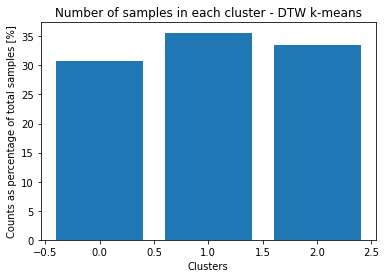

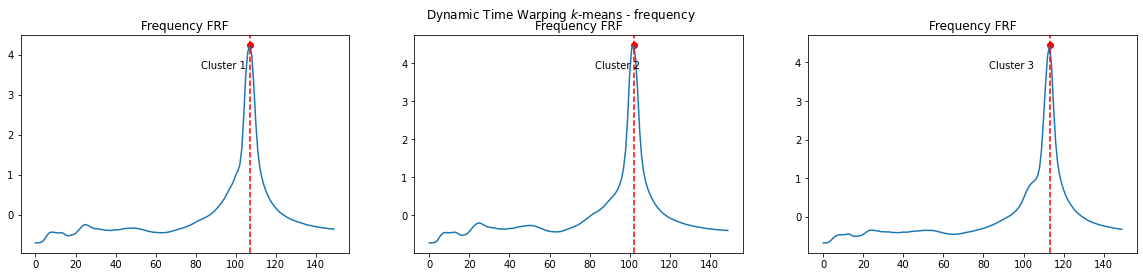

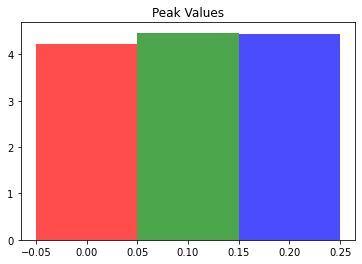

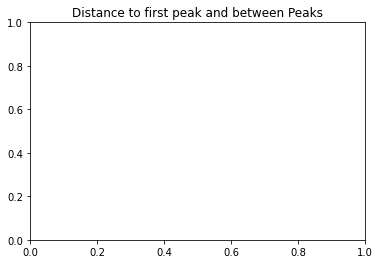

In [442]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=3, clusters=1)

(6, 150, 2)


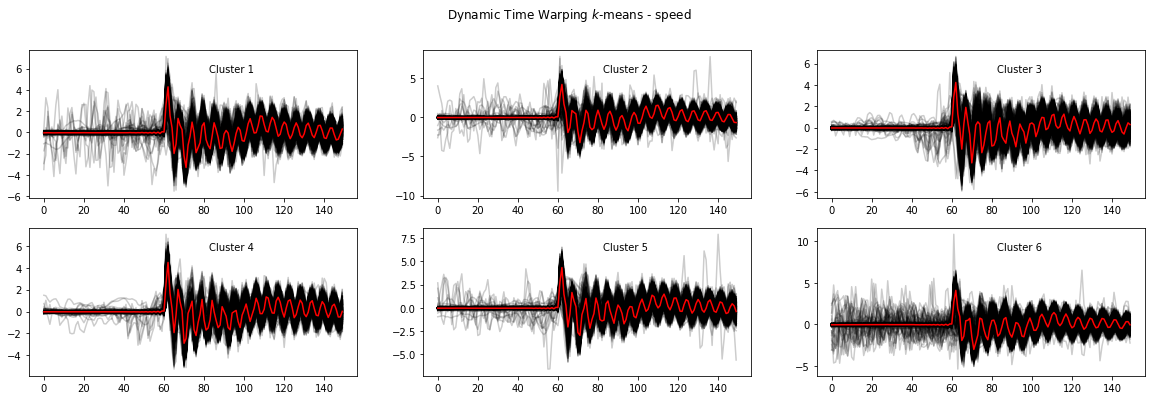

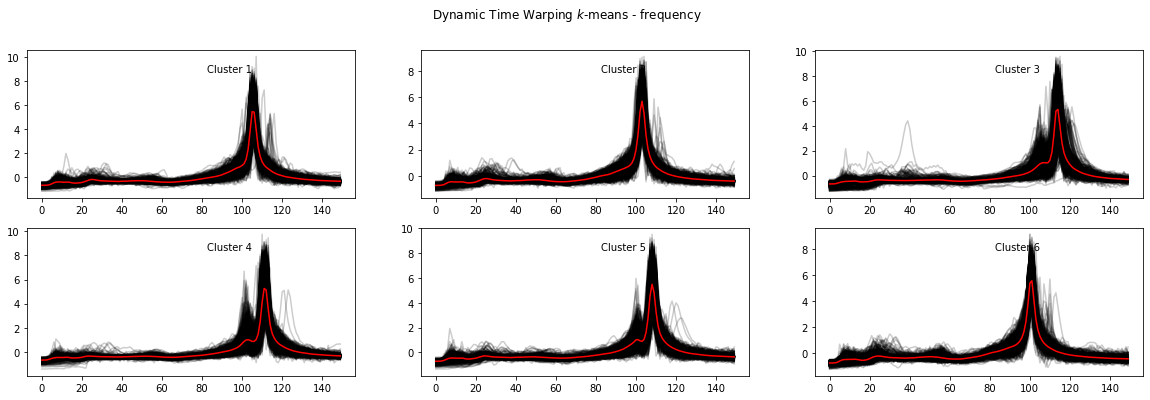

Smaller Peaks Data:  17.51 %
(array([0, 1, 2, 3, 4, 5]), array([1243, 1413, 1446, 1266, 1254, 1448]))


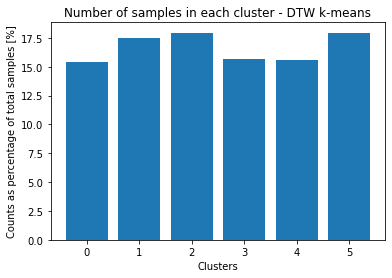

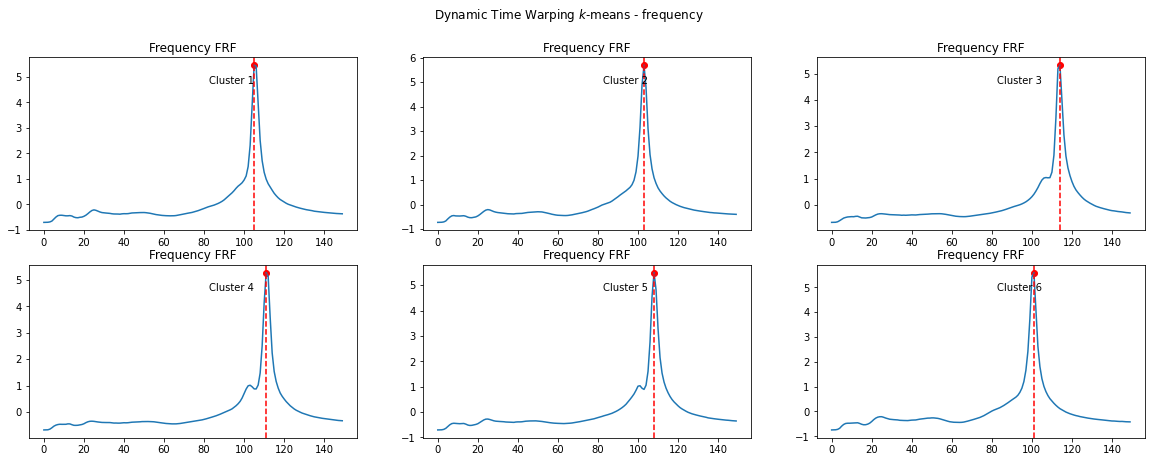

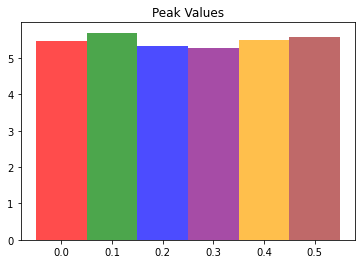

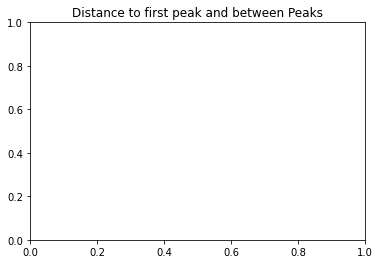

In [443]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=6, clusters=1)

(9, 150, 2)


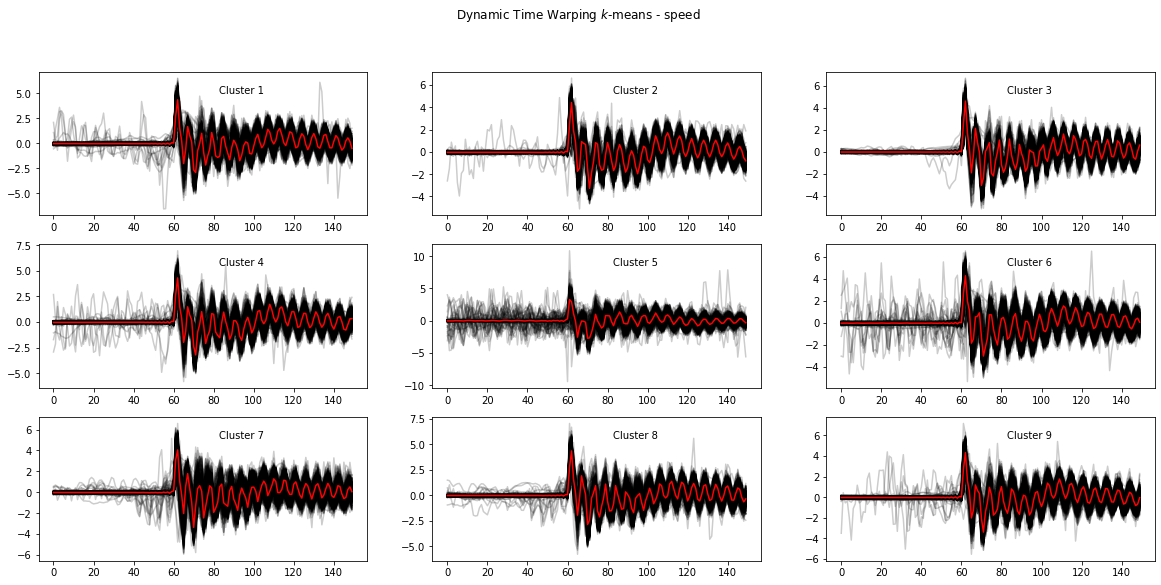

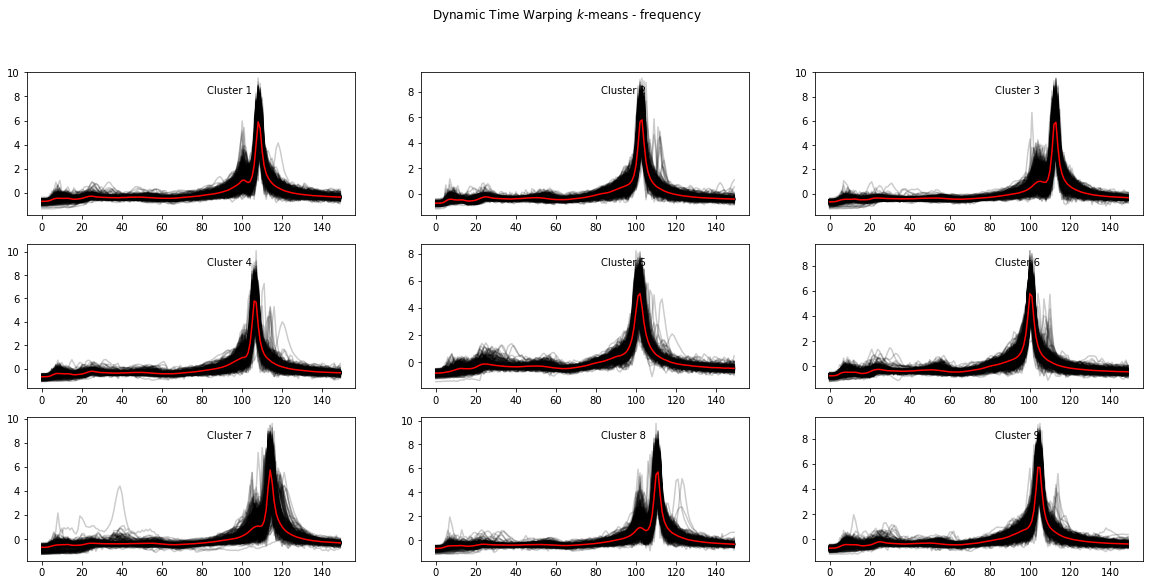

Smaller Peaks Data:  12.04 %
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([ 872,  972, 1067,  907,  426, 1108,  905,  818,  995]))


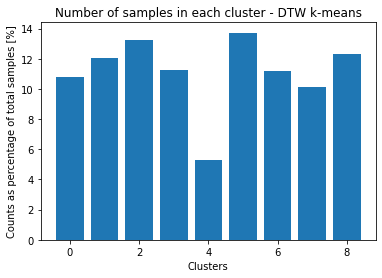

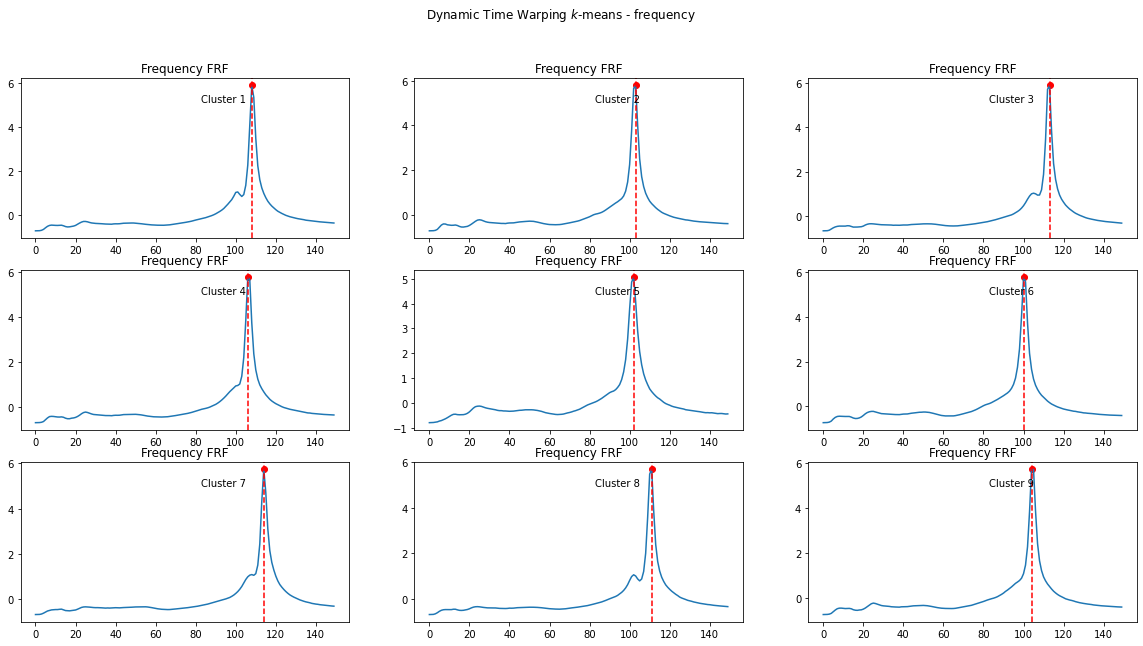

IndexError: list index out of range

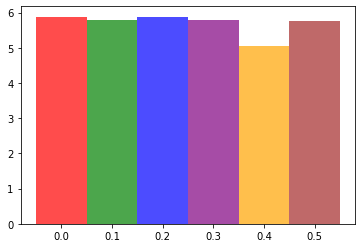

In [461]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=9, clusters=1)

(18, 150, 2)


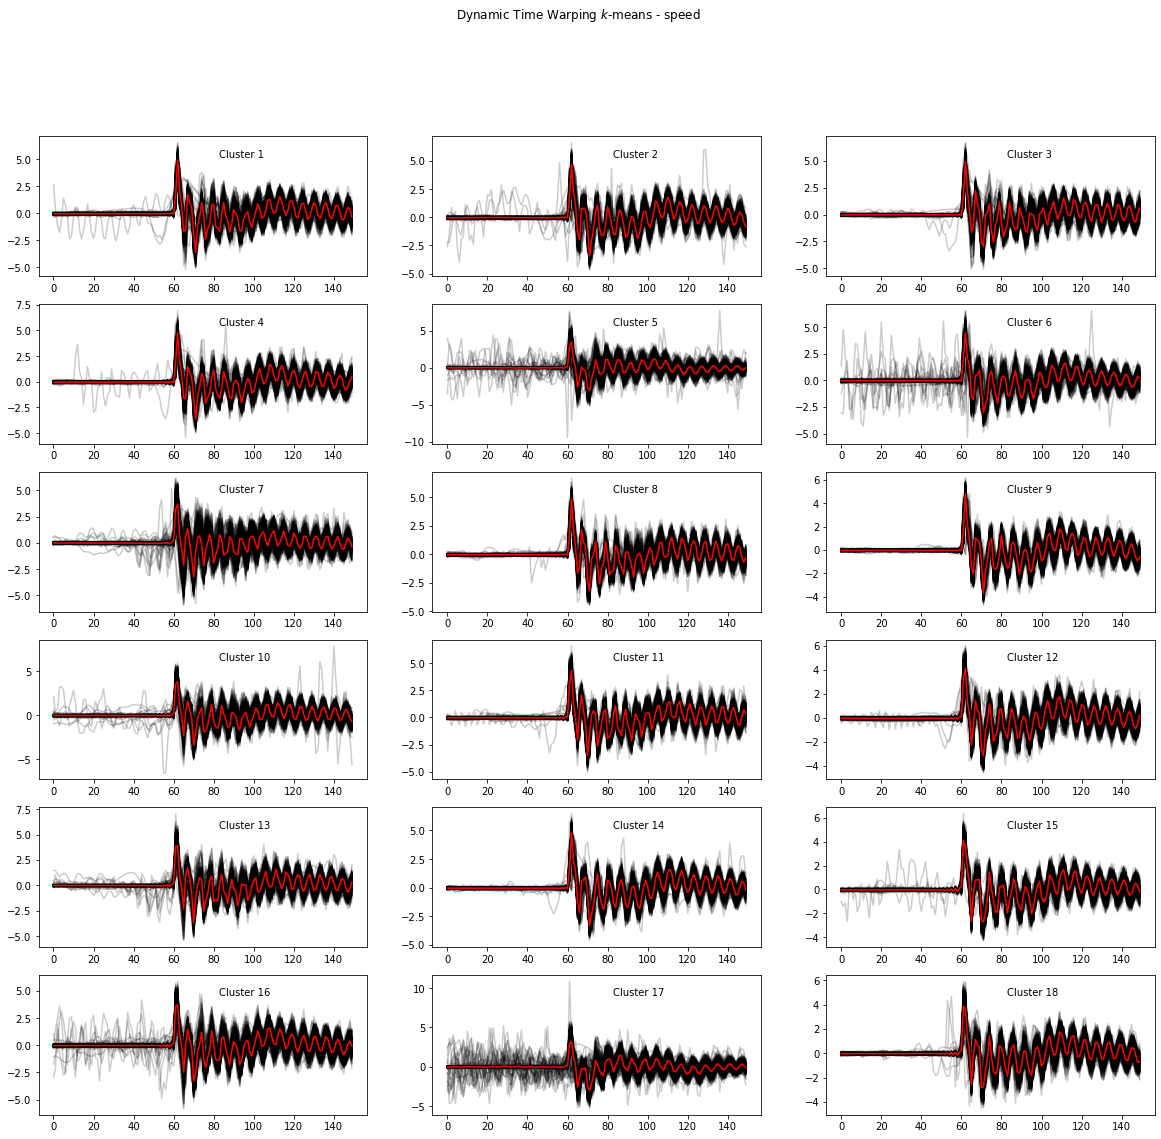

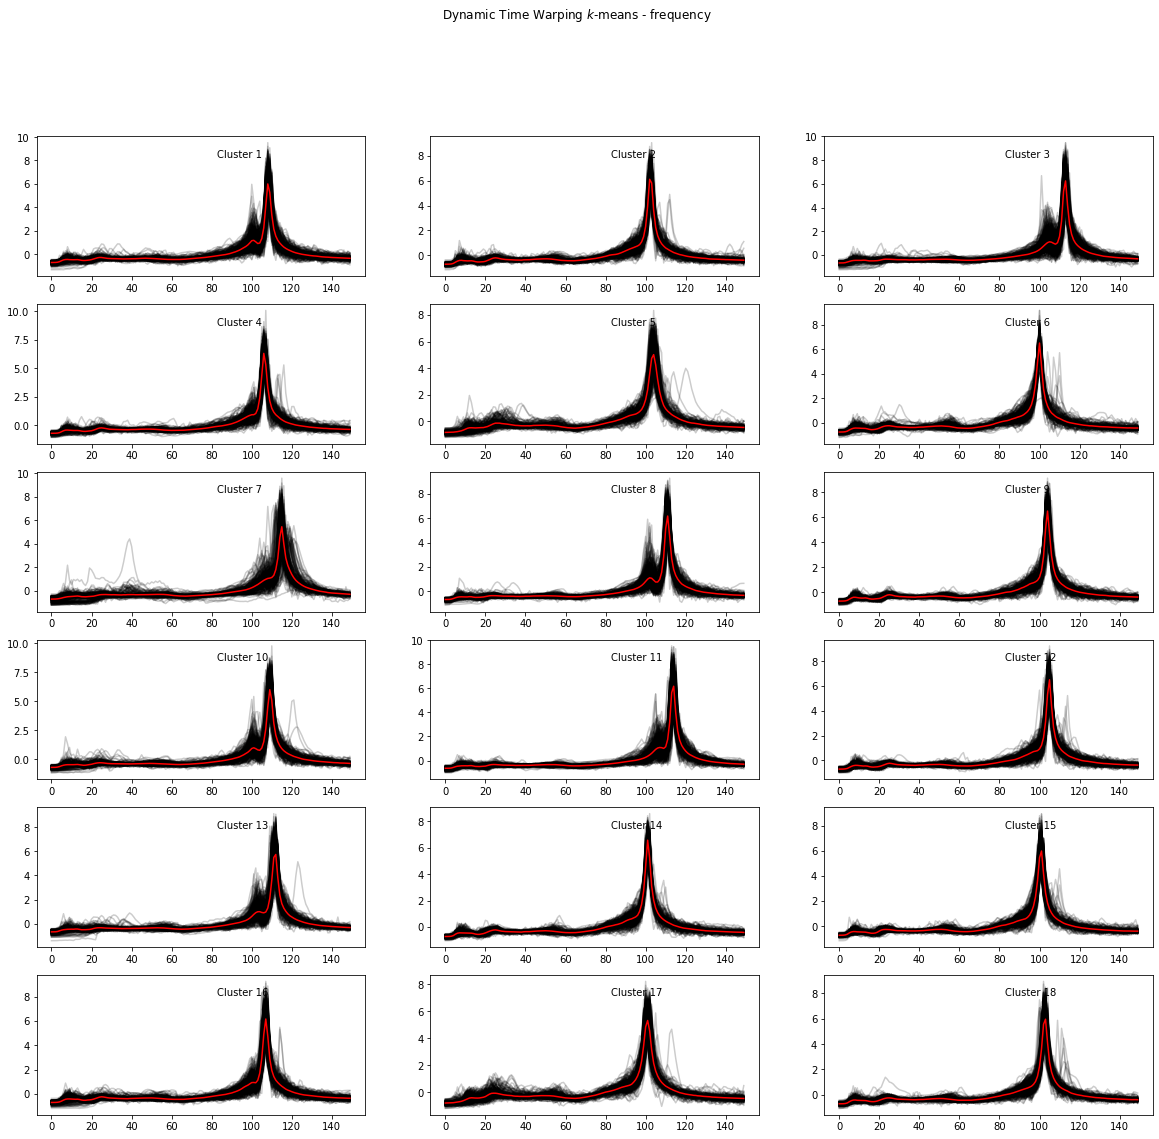

Smaller Peaks Data:  5.53 %
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]), array([497, 446, 626, 500, 242, 406, 332, 468, 446, 463, 694, 495, 478,
       342, 412, 511, 302, 410]))


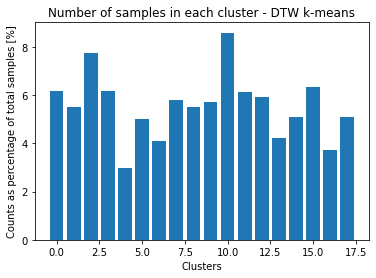

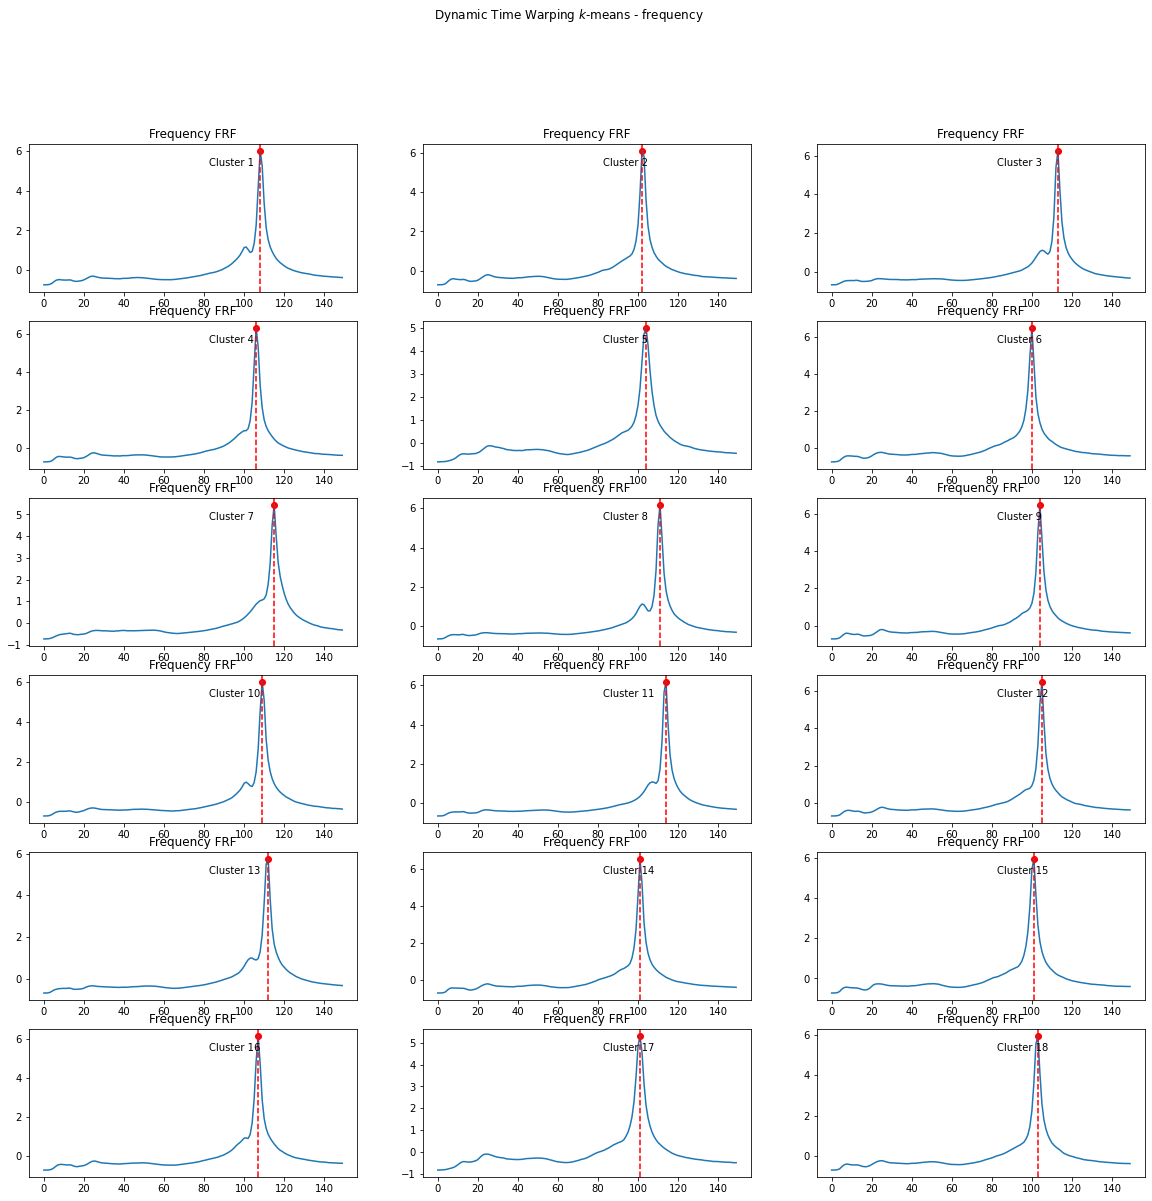

IndexError: list index out of range

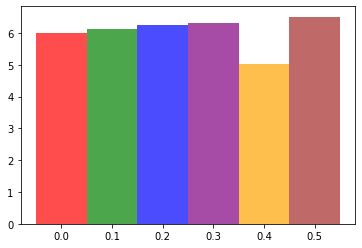

In [462]:
peaks,distances = TimeSeriesKMeans_results(nb_clusters=18, clusters=1)

In [ ]:
x = [i for i in range(len(peaks_values[0]))]
width = 0.1
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
for i in range(len(peaks_values)):
    for j,val in enumerate(peaks_values[i]):
        plt.bar(x[j]+width*i, val, width=width, color=colors[i],alpha=0.7)
plt.title("Peak Values")
plt.show()

x = [i for i in range(len(distances[0]))]
for i in range(len(distances)):
    for j,val in enumerate(distances[i]):
        plt.barh(x[j]+width*i, val, height=width, color=colors[i], alpha=0.7)
plt.title("Distance between Peaks")
plt.show()

# Part II.2 - extra codes

(6, 450, 2)


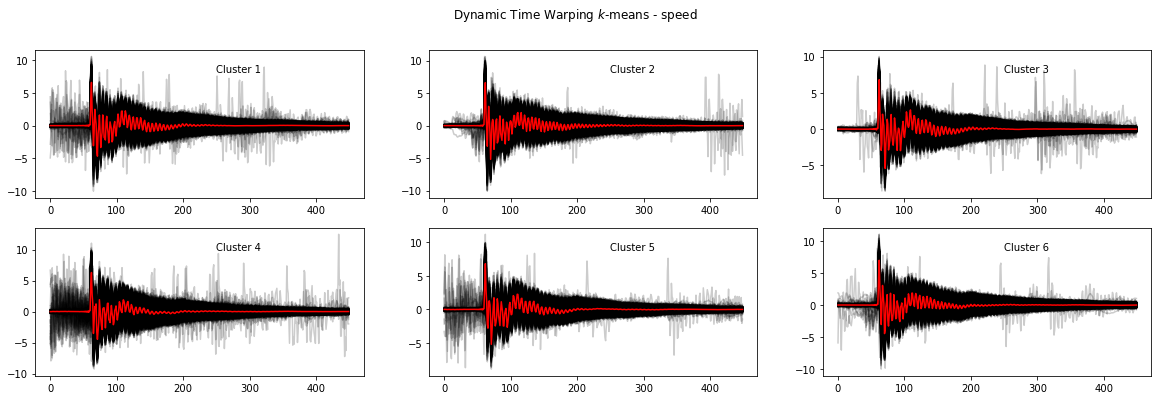

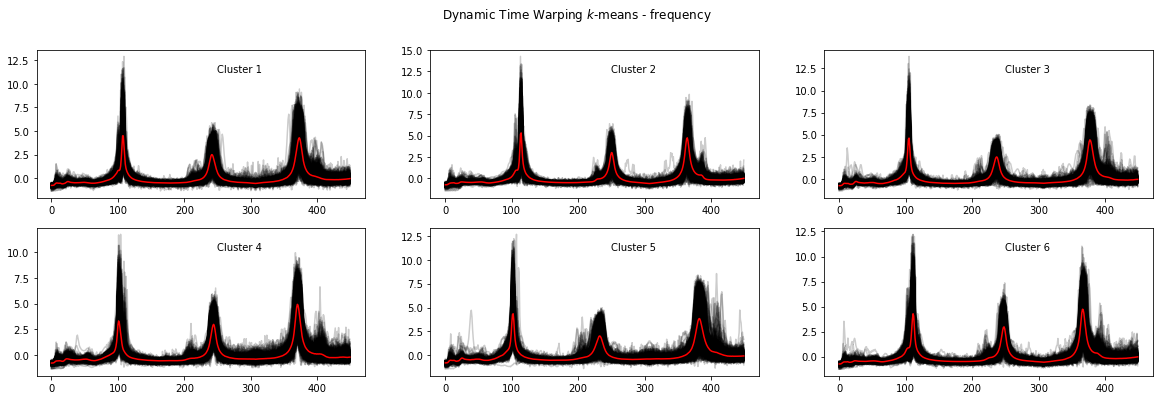

Smaller Peaks Data:  10.46 %
(array([0, 1, 2, 3, 4, 5]), array([1354, 1455, 1152, 1583,  988, 1538]))


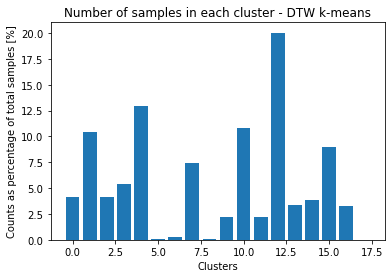

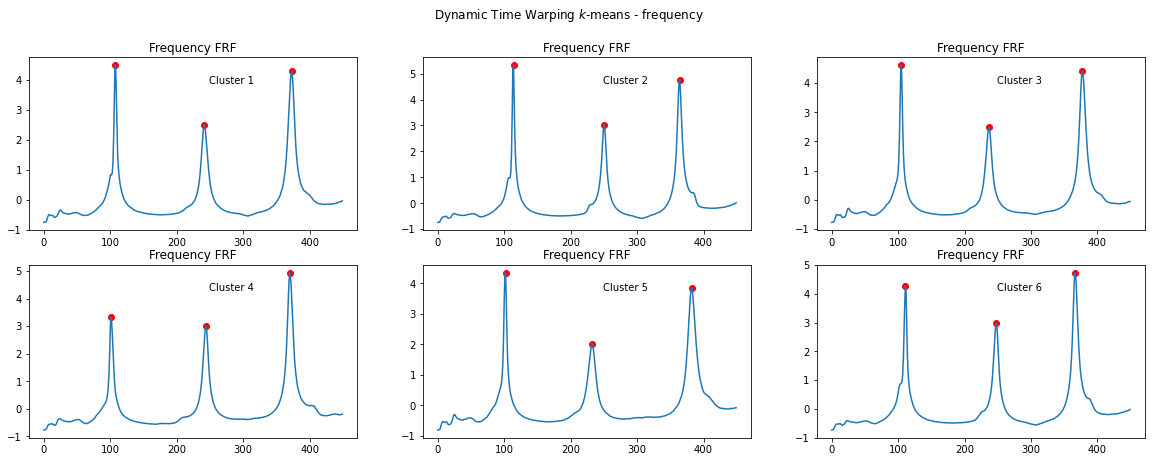

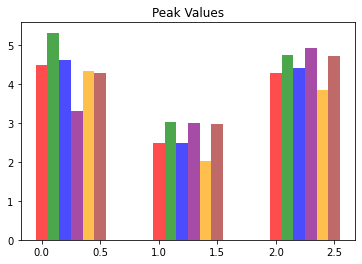

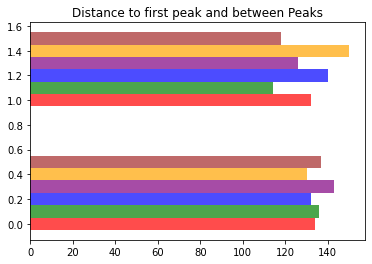

In [427]:
peaks, distances = TimeSeriesKMeans_results(nb_clusters=6, clusters=1)

In [398]:
# Removing noise from samples
inex_indices = cluster_labels_p2 == 8     # cluster 8 is the noisy one in the 18 clusterization
np_features_3 = np_features_2[~inex_indices]

In [257]:
np.unique((inex_indices), return_counts=True)

(array([False,  True]), array([8070,  119]))

In [258]:
nb_clusters = 6 #clusters
# based on speed and frequency data DTW
# multivariate features
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Use the np_vitesse and np_frf data to create a time series dataset
X_rnd = np_features_3

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_rnd)

# Create a TimeSeriesKMeans instance with 2,4 clusters
kmeans_2_features_3 = TimeSeriesKMeans(n_clusters=nb_clusters, random_state=seed)

# Fit the model to the data
cluster_labels_ = kmeans_2_features_3.fit_predict(X_scaled)

# Get the cluster centers
cluster_centers_2_features = kmeans_2_features_3.cluster_centers_
print(cluster_centers_2_features.shape)

(6, 450, 2)


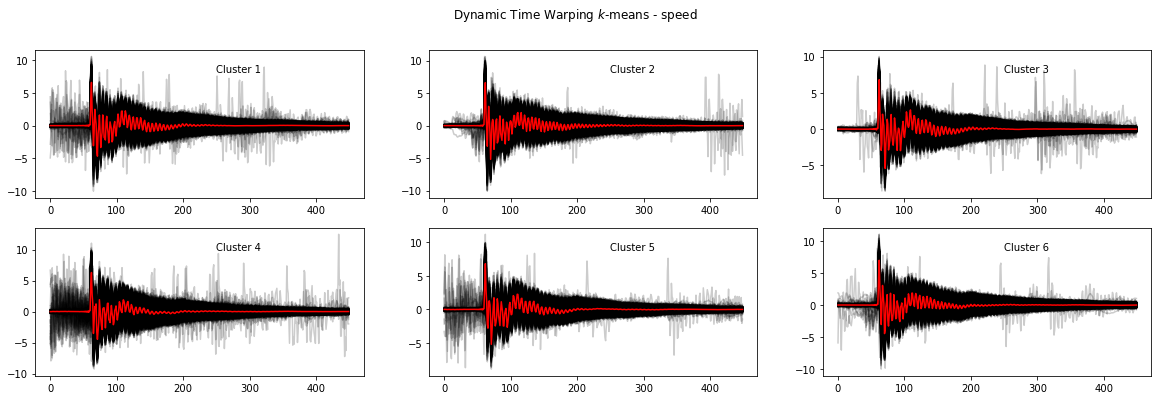

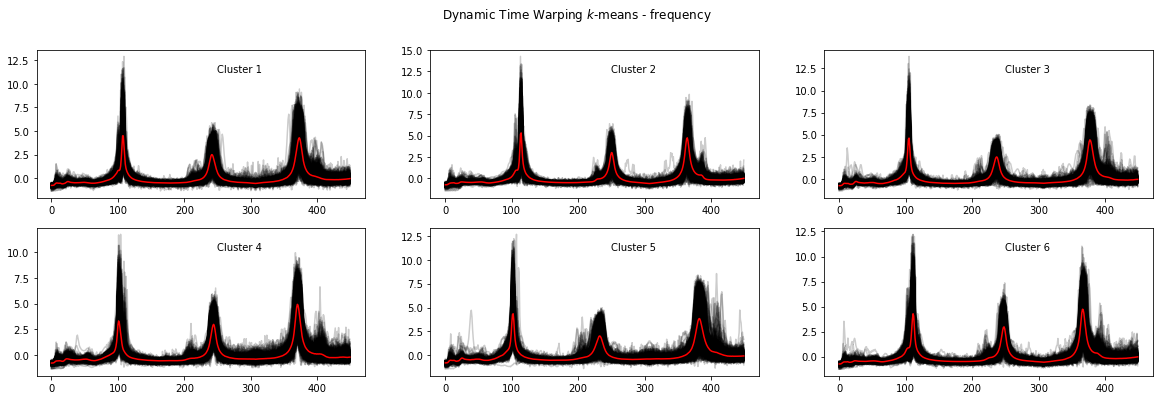

In [289]:
ttitle_=["speed", "frequency"]
for i in range(2):
    plt.figure(figsize=(20,nb_clusters))
    for yi in range(nb_clusters):
        plt.subplot(int(nb_clusters/3), 3, yi + 1)
        for xx in X_scaled[cluster_labels_ == yi][:,:,i]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(cluster_centers_2_features[yi][:,i].ravel(), "r-")
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
    plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])

Smaller Peaks Data:  14.28 %
(array([0, 1, 2, 3, 4, 5]), array([1354, 1455, 1152, 1583,  988, 1538]))


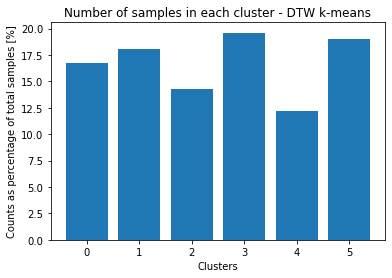

In [291]:
plot_cluster_counts(cluster_labels) #kmeans_2_features.predict(np_frf[rnd_indices][:5000])
value_counts = np.unique((cluster_labels), return_counts=True)
print("Smaller Peaks Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[2]])), "%")
print(np.unique((cluster_labels_), return_counts=True))

Peak values: [4.49620231 2.50087028 4.28696963]
Peak distances: [134, 132]


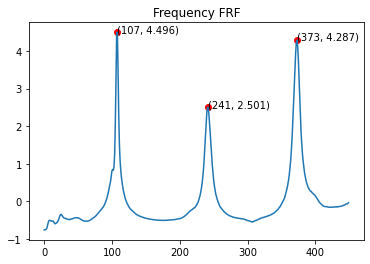

In [288]:
from scipy.signal import find_peaks

# Generate some time series data
data = cluster_centers_2_features[0][:,1].flatten()

# Find the peaks in the data
peaks, _ = find_peaks(data, distance=100)

# Plot the data
plt.plot(data)

# Plot the peaks
plt.scatter(peaks, data[peaks], c='r')

# # Display peaks values and time 
# for i, val in enumerate(peaks):
#     plt.text(val, data[val], f"({val}, {data[val]:.3f})")

# Add title
plt.title("Frequency FRF")

# Calculate the distance between the peaks
peak_distances = [x[peaks[i+1]] - x[peaks[i]] for i in range(len(peaks)-1)]

# Print the peaks values and the distances
print(f'Peak values: {data[peaks]}')
print(f'Peak distances: {peak_distances}')

plt.show()

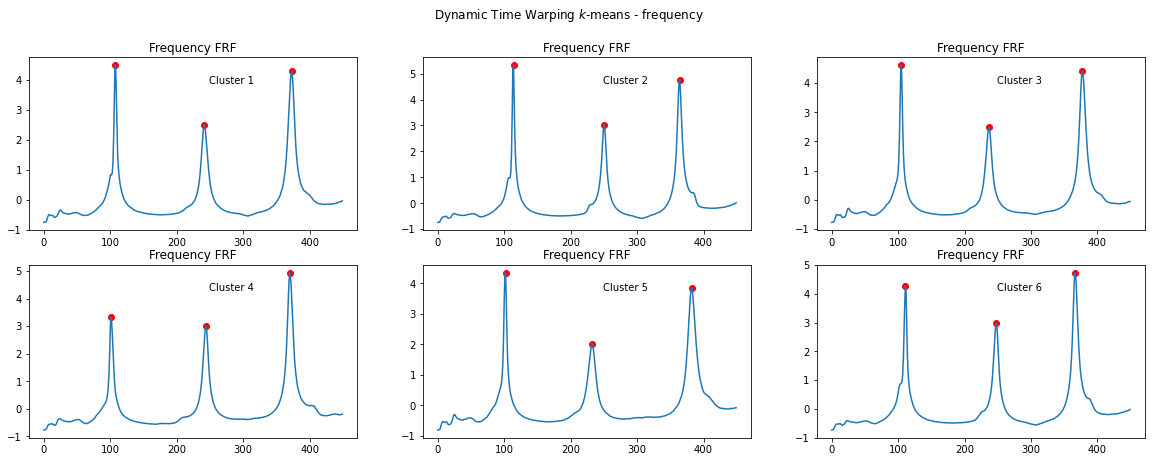

In [309]:
peaks_values, distances = [], []

plt.figure(figsize=(20,nb_clusters+1))
for yi in range(nb_clusters):
    plt.subplot(int(nb_clusters/3), 3, yi + 1)
    
    # Generate some time series data
    data = cluster_centers_2_features[yi][:,1].flatten()

    # Find the peaks in the data
    peaks, _ = find_peaks(data, distance=100, height=0.01)

    # Plot the data
    plt.plot(data)

    # Plot the peaks
    plt.scatter(peaks, data[peaks], c='r')
    
    # Add title
    plt.title("Frequency FRF")
    
    # Calculate the distance between the peaks
    peak_distances = [x[peaks[i+1]] - x[peaks[i]] for i in range(len(peaks)-1)]
    
    # Save the peaks values and the distances
    peaks_values.append(data[peaks].tolist())
    distances.append(peak_distances)

    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
    plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])

In [314]:
print(f'Peak values:')
for s in peaks_values:
    print(s) 
print(f'Peak distances:')
print(distances)

Peak values:
[4.496202307768416, 2.500870276026599, 4.286969626897569]
[5.326601700657124, 3.0301793473636245, 4.749510280112614]
[4.61370245101369, 2.485003502983874, 4.411458475759155]
[3.3241056809782665, 2.995047941212354, 4.9384868257994246]
[4.348426332777041, 2.0208845028806413, 3.8451776910180864]
[4.28137992244968, 2.971706315060995, 4.734959343378434]
Peak distances:
[[134, 132], [136, 114], [132, 140], [143, 126], [130, 150], [137, 118]]


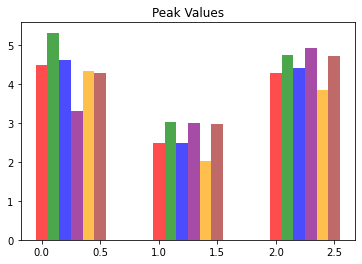

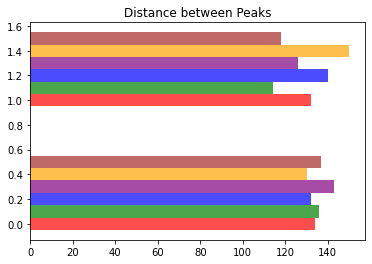

In [366]:
import seaborn as sns

# for peaks in peaks_values:
#     plt.bar(range(len(peaks)), peaks, alpha=0.7)
# plt.title("Peak Values")
# plt.show()

# for distance in distances:
#     plt.barh(range(len(distance)), distance, alpha=0.7)
# plt.title("Distance between Peaks")
# plt.show()

x = [i for i in range(len(peaks_values[0]))]
width = 0.1
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
for i in range(len(peaks_values)):
    for j,val in enumerate(peaks_values[i]):
        plt.bar(x[j]+width*i, val, width=width, color=colors[i],alpha=0.7)
plt.title("Peak Values")
plt.show()

x = [i for i in range(len(distances[0]))]
for i in range(len(distances)):
    for j,val in enumerate(distances[i]):
        plt.barh(x[j]+width*i, val, height=width, color=colors[i], alpha=0.7)
plt.title("Distance between Peaks")
plt.show()

# Extra coding

In [ ]:
df_ = df.join(df_cluster)
# df_.head()

In [ ]:
np.delete(np.array(range(18)),[6,12,17])

In [ ]:
for i in [6,12,17]:
    df_.loc[df_["cluster"]== i , "cluster"] = 0 #
# df_.loc[df_["cluster"]== 12, "cluster"] = int(0) #[6,12,17]
# df_.loc[df_["cluster"]== 17, "cluster"] = int(0) #[6,12,17]

for i in np.delete(np.array(range(18)),[6,12,17]):
    df_.loc[df_["cluster"]!= i, "cluster"] = 1 #[6,12,17]

In [ ]:
(df_["cluster"]==1).value_counts()/100

In [ ]:
(df_["Exploitable"]==df_.cluster).value_counts()/100

In [ ]:
df_.groupby(["cluster"])["cluster"].value_counts()

In [ ]:
# Plot the cluster centers
import matplotlib.pyplot as plt
for cluster_center in cluster_centers_2_features:
    plt.plot(cluster_center[0], cluster_center[1], "o-")
plt.show()

In [ ]:
# Plot the cluster centers
import matplotlib.pyplot as plt
for cluster_center in cluster_centers_2_features:
    plt.plot(cluster_center[0], cluster_center[1], "o-")
plt.show()

In [ ]:
print(kmeans_2_features.cluster_centers_.shape)
print(model_speed_18_200.cluster_centers_.shape)

In [ ]:
cluster_center.shape

In [ ]:
from tslearn.datasets import CachedDatasets
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

In [ ]:
elbow_data = []
for n_clusters in [3,6,9,18,27,36,45,54,63,72,81,90,99]:
    
    X_train = np_vitesse[rnd_indices][:1000] # using only first 1.000 as a sample

    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42,n_jobs=-1)
    y_pred = km.fit_predict(X_train)
    elbow_data.append((n_clusters, km.inertia_))

pd.DataFrame(elbow_data,columns=['clusters', 'distance']).plot(x='clusters',y='distance')

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
# tsfresh.feature_extraction.feature_calculators()

In [ ]:
# np.save("np_data", np_data, allow_pickle=False)

In [ ]:
# data_array = np.array(undersample_data.T.drop('datetime').values)

# model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
# model.fit(data_array)
# cities_list = undersample_data.T.drop('datetime').index.tolist()

In [10]:
labels___ = np.load("/Users/sdonzis/Desktop/Projet_IACHM/classes/data_labels.npy")
labels___.shape

(4120,)